In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# BNB Coin

In [2]:
BNBCoin = pd.read_csv('D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/BNB Historical Data.csv')

In [3]:


# Chọn cột "Date" và "Price"
BNBCoindata = BNBCoin[['Date', 'Price']]

# Chuyển cột "Date" thành chỉ số
BNBCoindata['Date'] = pd.to_datetime(BNBCoindata['Date'])
BNBCoindata.set_index('Date', inplace=True)
BNBCoindata.sort_values('Date', inplace=True)
# Chuẩn hóa Price trị
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(BNBCoindata)

# Chuẩn bị dữ liệu cho MLP
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)


C:\Users\Rua\AppData\Local\Temp\ipykernel_26332\2080262039.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BNBCoindata['Date'] = pd.to_datetime(BNBCoindata['Date'])
C:\Users\Rua\AppData\Local\Temp\ipykernel_26332\2080262039.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BNBCoindata.sort_values('Date', inplace=True)


## Devide data 8:2

In [4]:

X_train_BNBCoin_82, X_test_BNBCoin_82, y_train_BNBCoin_82, y_test_BNBCoin_82 = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_BNBCoin_82 = np.reshape(X_train_BNBCoin_82, (X_train_BNBCoin_82.shape[0], X_train_BNBCoin_82.shape[1], 1))
X_test_BNBCoin_82 = np.reshape(X_test_BNBCoin_82, (X_test_BNBCoin_82.shape[0], X_test_BNBCoin_82.shape[1], 1))


Build and fit model MLP

In [5]:
MLP_Model_BNBCoin_82 = Sequential()
MLP_Model_BNBCoin_82.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_BNBCoin_82.add(Dense(64, activation='relu'))
MLP_Model_BNBCoin_82.add(Dense(32, activation='relu'))
MLP_Model_BNBCoin_82.add(Dense(1))
MLP_Model_BNBCoin_82.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_BNBCoin_82.summary()
MLP_Model_BNBCoin_82.fit(X_train_BNBCoin_82, y_train_BNBCoin_82, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 - 1s - 26ms/step - loss: 0.0969
Epoch 2/100
24/24 - 0s - 1ms/step - loss: 0.0194
Epoch 3/100
24/24 - 0s - 1ms/step - loss: 0.0076
Epoch 4/100
24/24 - 0s - 1ms/step - loss: 0.0027
Epoch 5/100
24/24 - 0s - 1ms/step - loss: 8.0125e-04
Epoch 6/100
24/24 - 0s - 1ms/step - loss: 4.8452e-04
Epoch 7/100
24/24 - 0s - 1ms/step - loss: 4.6357e-04
Epoch 8/100
24/24 - 0s - 1ms/step - loss: 4.5692e-04
Epoch 9/100
24/24 - 0s - 1ms/step - loss: 4.5149e-04
Epoch 10/100
24/24 - 0s - 1ms/step - loss: 4.5351e-04
Epoch 11/100
24/24 - 0s - 1ms/step - loss: 4.5148e-04
Epoch 12/100
24/24 - 0s - 1ms/step - loss: 4.5331e-04
Epoch 13/100
24/24 - 0s - 1ms/step - loss: 4.4698e-04
Epoch 14/100
24/24 - 0s - 1ms/step - loss: 4.5378e-04
Epoch 15/100
24/24 - 0s - 1ms/step - loss: 4.4654e-04
Epoch 16/100
24/24 - 0s - 1ms/step - loss: 4.5610e-04
Epoch 17/100
24/24 - 0s - 1ms/step - loss: 4.4490e-04
Epoch 18/100
24/24 - 0s - 1ms/step - loss: 4.4603e-04
Epoch 19/100
24/24 - 0s - 1ms/step - loss: 4.4770e-0

Predict in test

In [6]:
y_pred_BNBCoin_82 = MLP_Model_BNBCoin_82.predict(X_test_BNBCoin_82)
y_test_BNBCoin_82_inv = scaler.inverse_transform([y_test_BNBCoin_82])
y_pred_BNBCoin_82_inv = scaler.inverse_transform([y_pred_BNBCoin_82.flatten()])


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Predict 30 days

In [7]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_30days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

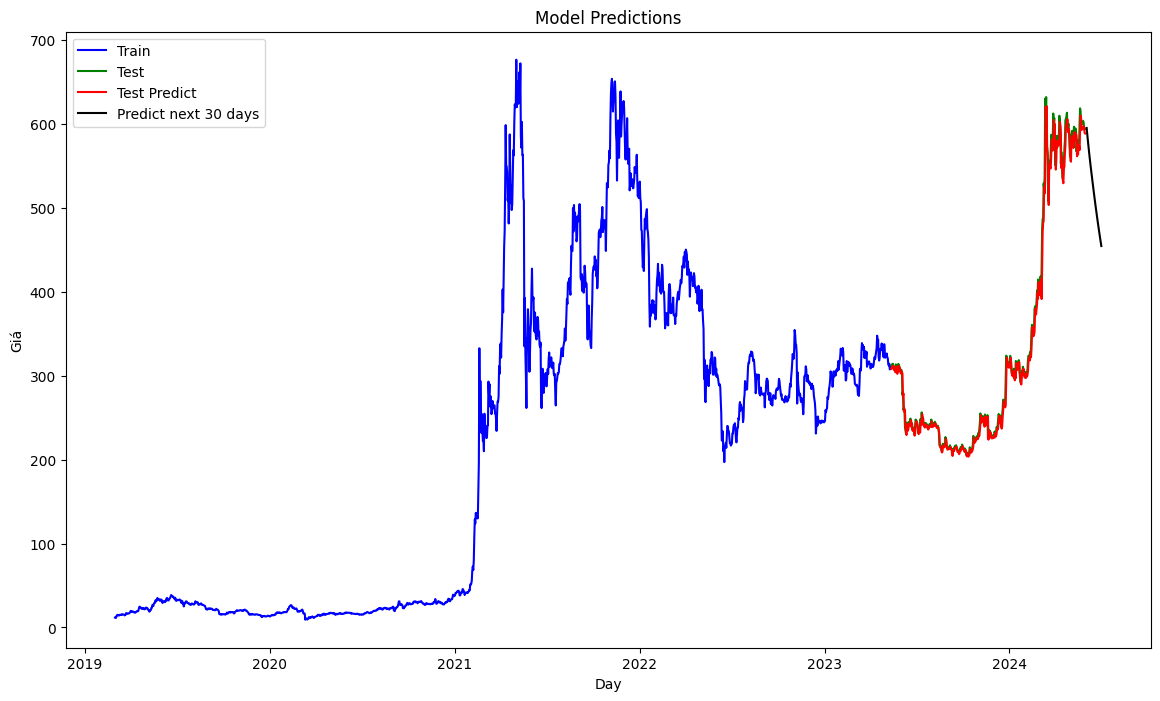

In [8]:

y_train_BNBCoin_82_inv = scaler.inverse_transform([y_train_BNBCoin_82])
y_pred_BNBCoin_82_inv = scaler.inverse_transform(y_pred_BNBCoin_82)
future_dates_BNBCoin_30days_82 = pd.date_range(start=BNBCoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_82):(len(X_train_BNBCoin_82) + len(X_test_BNBCoin_82))]
plt.plot(test_index, y_test_BNBCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_82_inv, label='Test Predict ', color='red')

# Vẽ dự đoán 30 Day tiếp theo với màu đen
plt.plot(future_dates_BNBCoin_30days_82, predictions_BNBCoin_30days_82_inv , label='Predict next 30 days', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Giá')
plt.legend()
plt.show()


Predict 60 days

In [9]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_60days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

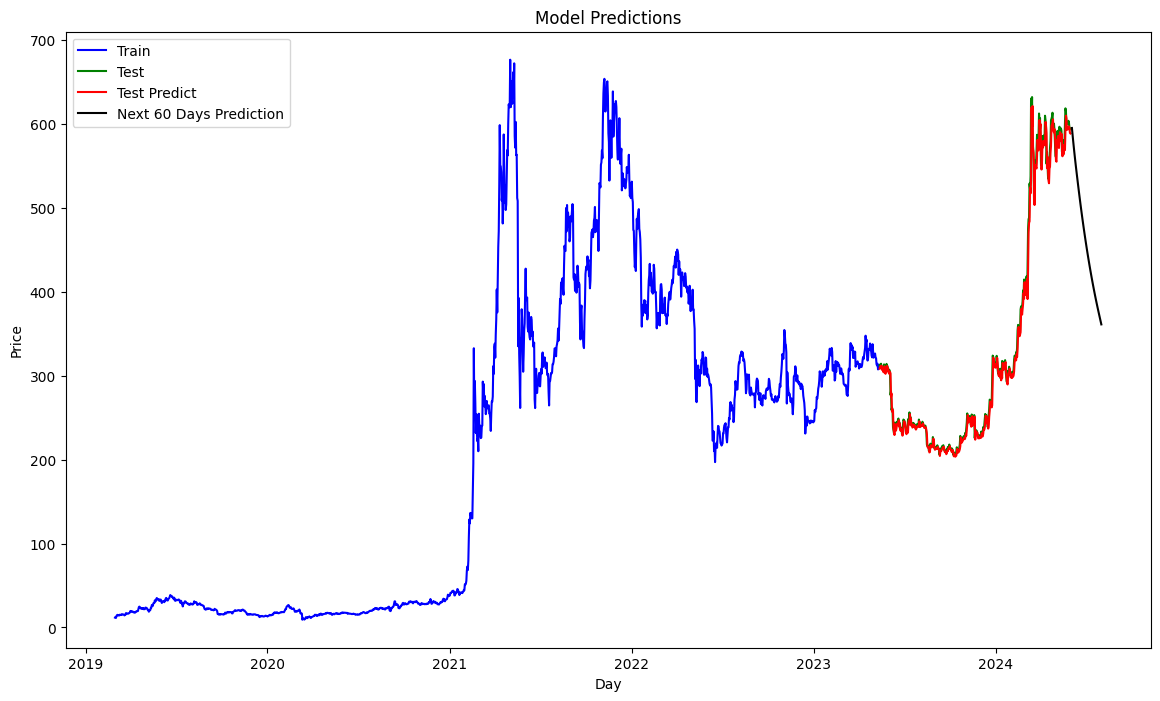

In [10]:

y_train_BNBCoin_82_inv = scaler.inverse_transform([y_train_BNBCoin_82])
y_pred_BNBCoin_82_inv = scaler.inverse_transform(y_pred_BNBCoin_82)
future_dates_BNBCoin_60days_82 = pd.date_range(start=BNBCoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_82):(len(X_train_BNBCoin_82) + len(X_test_BNBCoin_82))]
plt.plot(test_index, y_test_BNBCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_60days_82, predictions_BNBCoin_60days_82_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [11]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_90days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

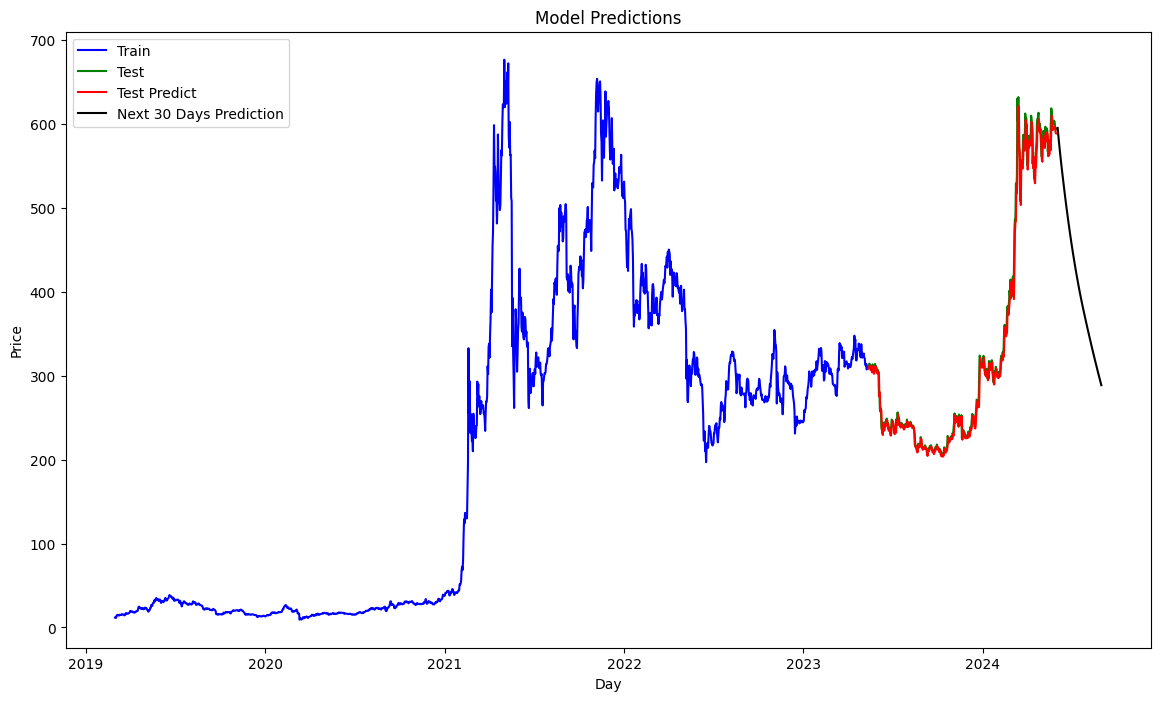

In [12]:

y_train_BNBCoin_82_inv = scaler.inverse_transform([y_train_BNBCoin_82])
y_pred_BNBCoin_82_inv = scaler.inverse_transform(y_pred_BNBCoin_82)
future_dates_BNBCoin_90days_82 = pd.date_range(start=BNBCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_82):(len(X_train_BNBCoin_82) + len(X_test_BNBCoin_82))]
plt.plot(test_index, y_test_BNBCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_90days_82, predictions_BNBCoin_90days_82_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


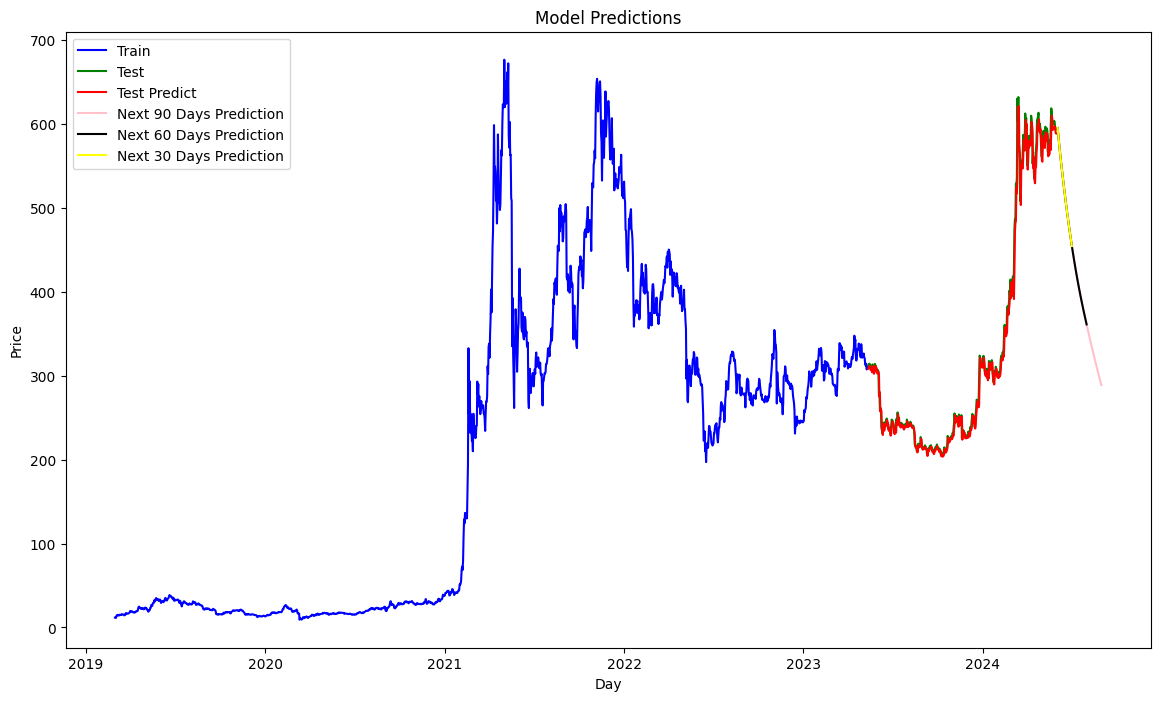

In [13]:

y_train_BNBCoin_82_inv = scaler.inverse_transform([y_train_BNBCoin_82])
y_pred_BNBCoin_82_inv = scaler.inverse_transform(y_pred_BNBCoin_82)
future_dates = pd.date_range(start=BNBCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_82):(len(X_train_BNBCoin_82) + len(X_test_BNBCoin_82))]
plt.plot(test_index, y_test_BNBCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_90days_82, predictions_BNBCoin_90days_82_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_BNBCoin_60days_82, predictions_BNBCoin_60days_82_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_BNBCoin_30days_82, predictions_BNBCoin_30days_82_inv , label='Next 30 Days Prediction', color='yellow')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [14]:
y_pred_BNBCoin_82_inv = scaler.inverse_transform([y_pred_BNBCoin_82.flatten()])
# Tính toán MSE và MAPE
mse_82 = mean_squared_error(y_test_BNBCoin_82_inv[0], y_pred_BNBCoin_82_inv[0])
rmse_82 = np.sqrt(mse_82)
mape_82 = mean_absolute_percentage_error(y_test_BNBCoin_82_inv[0], y_pred_BNBCoin_82_inv[0])
print(f"MSE: {mse_82}")
print(f"RMSE: {rmse_82}")
print(f"MAPE: {mape_82}")


MSE: 143.2445270452295
RMSE: 11.968480565436428
MAPE: 0.0197119169805152


## Devide data 7:3

In [15]:

X_train_BNBCoin_73, X_test_BNBCoin_73, y_train_BNBCoin_73, y_test_BNBCoin_73 = train_test_split(X, Y, test_size=0.3, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_BNBCoin_73 = np.reshape(X_train_BNBCoin_73, (X_train_BNBCoin_73.shape[0], X_train_BNBCoin_73.shape[1], 1))
X_test_BNBCoin_73 = np.reshape(X_test_BNBCoin_73, (X_test_BNBCoin_73.shape[0], X_test_BNBCoin_73.shape[1], 1))


Build and fit model MLP

In [16]:
MLP_Model_BNBCoin_73 = Sequential()
MLP_Model_BNBCoin_73.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_BNBCoin_73.add(Dense(64, activation='relu'))
MLP_Model_BNBCoin_73.add(Dense(32, activation='relu'))
MLP_Model_BNBCoin_73.add(Dense(1))
MLP_Model_BNBCoin_73.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_BNBCoin_73.summary()
MLP_Model_BNBCoin_73.fit(X_train_BNBCoin_73, y_train_BNBCoin_73, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
21/21 - 1s - 31ms/step - loss: 0.1160
Epoch 2/100
21/21 - 0s - 1ms/step - loss: 0.0390
Epoch 3/100
21/21 - 0s - 1ms/step - loss: 0.0128
Epoch 4/100
21/21 - 0s - 2ms/step - loss: 0.0039
Epoch 5/100
21/21 - 0s - 1ms/step - loss: 0.0011
Epoch 6/100
21/21 - 0s - 1ms/step - loss: 5.9598e-04
Epoch 7/100
21/21 - 0s - 744us/step - loss: 5.2020e-04
Epoch 8/100
21/21 - 0s - 1ms/step - loss: 5.0646e-04
Epoch 9/100
21/21 - 0s - 1ms/step - loss: 4.9663e-04
Epoch 10/100
21/21 - 0s - 1ms/step - loss: 4.9681e-04
Epoch 11/100
21/21 - 0s - 1ms/step - loss: 4.9647e-04
Epoch 12/100
21/21 - 0s - 1ms/step - loss: 4.9485e-04
Epoch 13/100
21/21 - 0s - 1ms/step - loss: 4.8946e-04
Epoch 14/100
21/21 - 0s - 1ms/step - loss: 4.9094e-04
Epoch 15/100
21/21 - 0s - 1ms/step - loss: 4.9172e-04
Epoch 16/100
21/21 - 0s - 1ms/step - loss: 4.9010e-04
Epoch 17/100
21/21 - 0s - 1ms/step - loss: 4.9516e-04
Epoch 18/100
21/21 - 0s - 1ms/step - loss: 4.9880e-04
Epoch 19/100
21/21 - 0s - 1ms/step - loss: 4.8877e-04


Predict in test

In [17]:
y_pred_BNBCoin_73 = MLP_Model_BNBCoin_73.predict(X_test_BNBCoin_73)
y_test_BNBCoin_73_inv = scaler.inverse_transform([y_test_BNBCoin_73])
y_pred_BNBCoin_73_inv = scaler.inverse_transform([y_pred_BNBCoin_73.flatten()])


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step


Predict 30 days

In [18]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_30days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

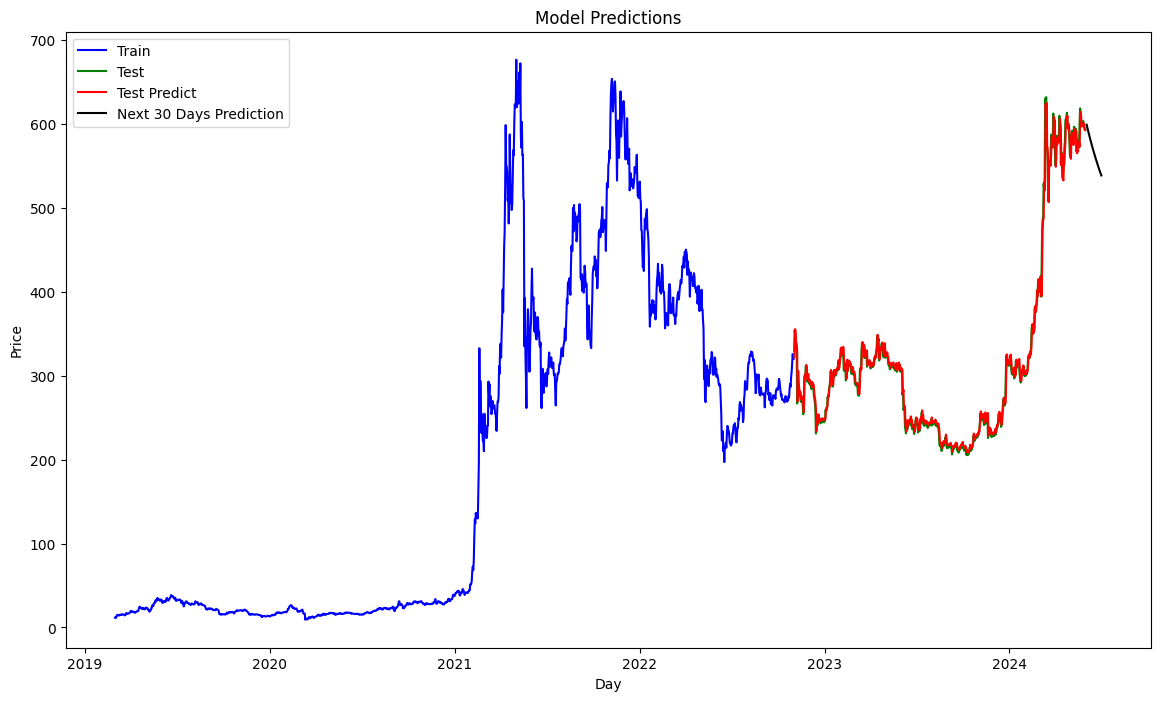

In [19]:

y_train_BNBCoin_73_inv = scaler.inverse_transform([y_train_BNBCoin_73])
y_pred_BNBCoin_73_inv = scaler.inverse_transform(y_pred_BNBCoin_73)
future_dates_BNBCoin_30days_73 = pd.date_range(start=BNBCoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))


train_index = BNBCoindata.index[:len(X_train_BNBCoin_73)]  
plt.plot(train_index, y_train_BNBCoin_73_inv[0], label='Train', color='blue')


test_index = BNBCoindata.index[len(X_train_BNBCoin_73):(len(X_train_BNBCoin_73) + len(X_test_BNBCoin_73))]
plt.plot(test_index, y_test_BNBCoin_73_inv[0], label='Test', color='green')


plt.plot(test_index, y_pred_BNBCoin_73_inv, label='Test Predict ', color='red')


plt.plot(future_dates_BNBCoin_30days_73, predictions_BNBCoin_30days_73_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [20]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_60days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

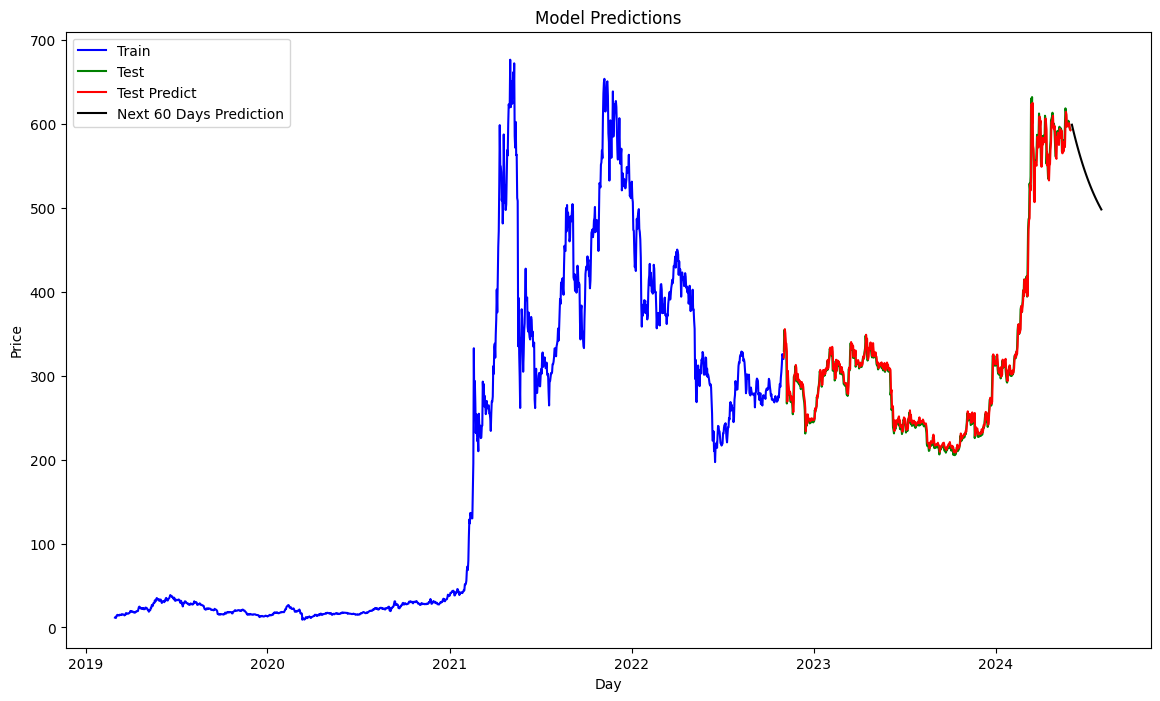

In [21]:

y_train_BNBCoin_73_inv = scaler.inverse_transform([y_train_BNBCoin_73])
y_pred_BNBCoin_73_inv = scaler.inverse_transform(y_pred_BNBCoin_73)
future_dates_BNBCoin_60days_73 = pd.date_range(start=BNBCoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_73):(len(X_train_BNBCoin_73) + len(X_test_BNBCoin_73))]
plt.plot(test_index, y_test_BNBCoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_60days_73, predictions_BNBCoin_60days_73_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [22]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_90days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━

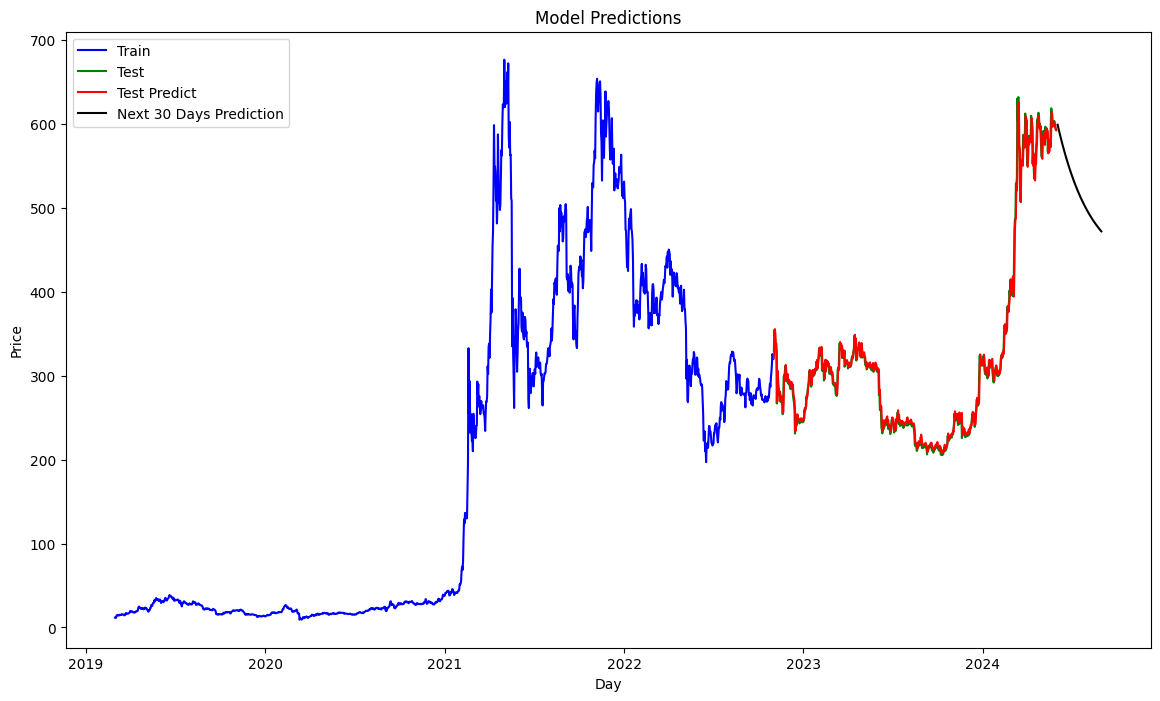

In [23]:

y_train_BNBCoin_73_inv = scaler.inverse_transform([y_train_BNBCoin_73])
y_pred_BNBCoin_73_inv = scaler.inverse_transform(y_pred_BNBCoin_73)
future_dates_BNBCoin_90days_73 = pd.date_range(start=BNBCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_73):(len(X_train_BNBCoin_73) + len(X_test_BNBCoin_73))]
plt.plot(test_index, y_test_BNBCoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_90days_73, predictions_BNBCoin_90days_73_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


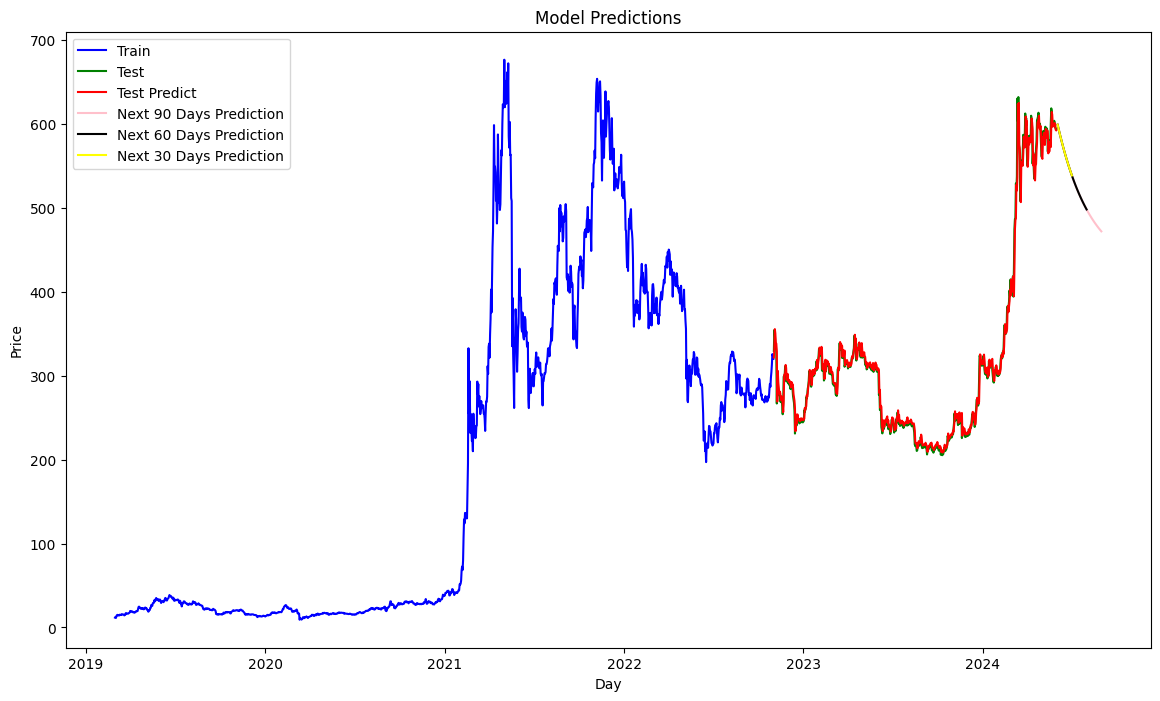

In [24]:

y_train_BNBCoin_73_inv = scaler.inverse_transform([y_train_BNBCoin_73])
y_pred_BNBCoin_73_inv = scaler.inverse_transform(y_pred_BNBCoin_73)
future_dates = pd.date_range(start=BNBCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_73):(len(X_train_BNBCoin_73) + len(X_test_BNBCoin_73))]
plt.plot(test_index, y_test_BNBCoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_90days_73, predictions_BNBCoin_90days_73_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_BNBCoin_60days_73, predictions_BNBCoin_60days_73_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_BNBCoin_30days_73, predictions_BNBCoin_30days_73_inv , label='Next 30 Days Prediction', color='yellow')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [25]:
y_pred_BNBCoin_73_inv = scaler.inverse_transform([y_pred_BNBCoin_73.flatten()])
# Tính toán MSE và MAPE
mse_73 = mean_squared_error(y_test_BNBCoin_73_inv[0], y_pred_BNBCoin_73_inv[0])
rmse_73 = np.sqrt(mse_73)
mape_73 = mean_absolute_percentage_error(y_test_BNBCoin_73_inv[0], y_pred_BNBCoin_73_inv[0])
print(f"MSE: {mse_73}")
print(f"RMSE: {rmse_73}")
print(f"MAPE: {mape_73}")


MSE: 118.68169464620102
RMSE: 10.894112843467385
MAPE: 0.020414924880801027


## Devide data 9:1

In [26]:

X_train_BNBCoin_91, X_test_BNBCoin_91, y_train_BNBCoin_91, y_test_BNBCoin_91 = train_test_split(X, Y, test_size=0.1, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_BNBCoin_91 = np.reshape(X_train_BNBCoin_91, (X_train_BNBCoin_91.shape[0], X_train_BNBCoin_91.shape[1], 1))
X_test_BNBCoin_91 = np.reshape(X_test_BNBCoin_91, (X_test_BNBCoin_91.shape[0], X_test_BNBCoin_91.shape[1], 1))


Build and fit model MLP

In [27]:
MLP_Model_BNBCoin_91 = Sequential()
MLP_Model_BNBCoin_91.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_BNBCoin_91.add(Dense(64, activation='relu'))
MLP_Model_BNBCoin_91.add(Dense(32, activation='relu'))
MLP_Model_BNBCoin_91.add(Dense(1))
MLP_Model_BNBCoin_91.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_BNBCoin_91.summary()
MLP_Model_BNBCoin_91.fit(X_train_BNBCoin_91, y_train_BNBCoin_91, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
27/27 - 1s - 20ms/step - loss: 0.0455
Epoch 2/100
27/27 - 0s - 2ms/step - loss: 0.0045
Epoch 3/100
27/27 - 0s - 1ms/step - loss: 6.2164e-04
Epoch 4/100
27/27 - 0s - 1ms/step - loss: 4.3298e-04
Epoch 5/100
27/27 - 0s - 1ms/step - loss: 4.1335e-04
Epoch 6/100
27/27 - 0s - 1ms/step - loss: 4.0478e-04
Epoch 7/100
27/27 - 0s - 1ms/step - loss: 4.0885e-04
Epoch 8/100
27/27 - 0s - 1ms/step - loss: 4.1448e-04
Epoch 9/100
27/27 - 0s - 1ms/step - loss: 4.0581e-04
Epoch 10/100
27/27 - 0s - 1ms/step - loss: 4.0379e-04
Epoch 11/100
27/27 - 0s - 1ms/step - loss: 4.0388e-04
Epoch 12/100
27/27 - 0s - 1ms/step - loss: 4.1298e-04
Epoch 13/100
27/27 - 0s - 1ms/step - loss: 4.1090e-04
Epoch 14/100
27/27 - 0s - 1ms/step - loss: 4.1041e-04
Epoch 15/100
27/27 - 0s - 1ms/step - loss: 4.1732e-04
Epoch 16/100
27/27 - 0s - 1ms/step - loss: 4.1189e-04
Epoch 17/100
27/27 - 0s - 1ms/step - loss: 4.0818e-04
Epoch 18/100
27/27 - 0s - 1ms/step - loss: 4.1045e-04
Epoch 19/100
27/27 - 0s - 1ms/step - loss: 4

Predict in test

In [28]:
y_pred_BNBCoin_91 = MLP_Model_BNBCoin_91.predict(X_test_BNBCoin_91)
y_test_BNBCoin_91_inv = scaler.inverse_transform([y_test_BNBCoin_91])
y_pred_BNBCoin_91_inv = scaler.inverse_transform([y_pred_BNBCoin_91.flatten()])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Predict 30 days

In [29]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_30days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

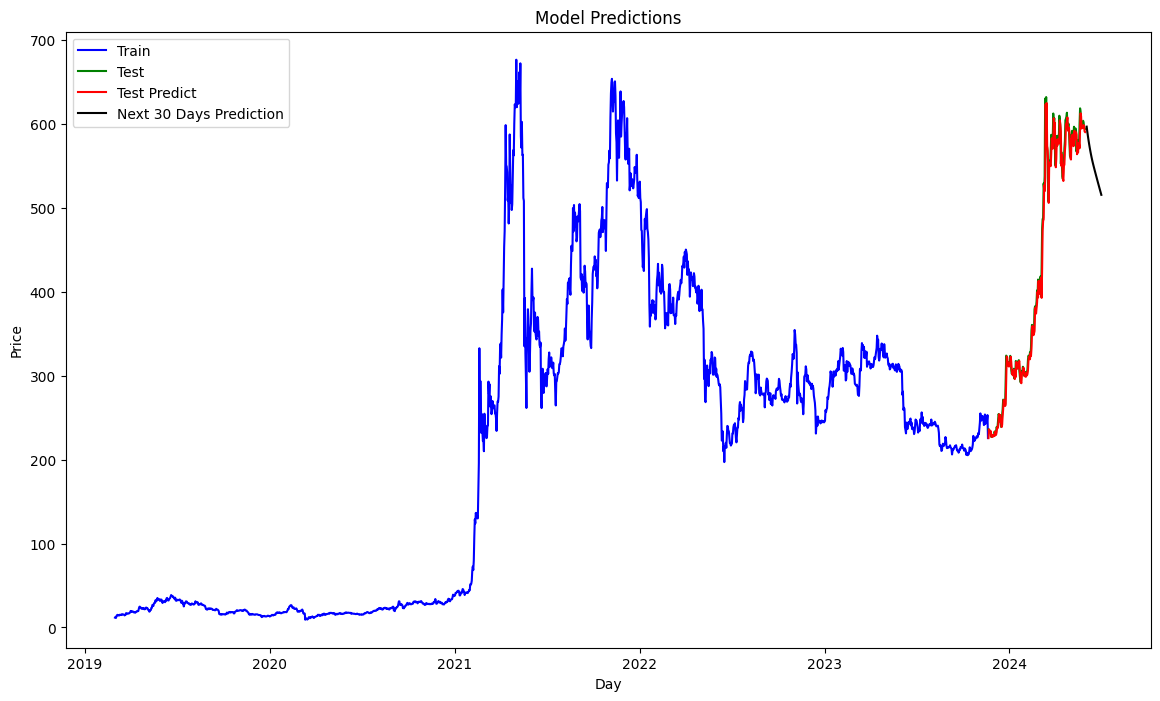

In [30]:

y_train_BNBCoin_91_inv = scaler.inverse_transform([y_train_BNBCoin_91])
y_pred_BNBCoin_91_inv = scaler.inverse_transform(y_pred_BNBCoin_91)
future_dates_BNBCoin_30days_91 = pd.date_range(start=BNBCoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_91):(len(X_train_BNBCoin_91) + len(X_test_BNBCoin_91))]
plt.plot(test_index, y_test_BNBCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_30days_91, predictions_BNBCoin_30days_91_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [31]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_60days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

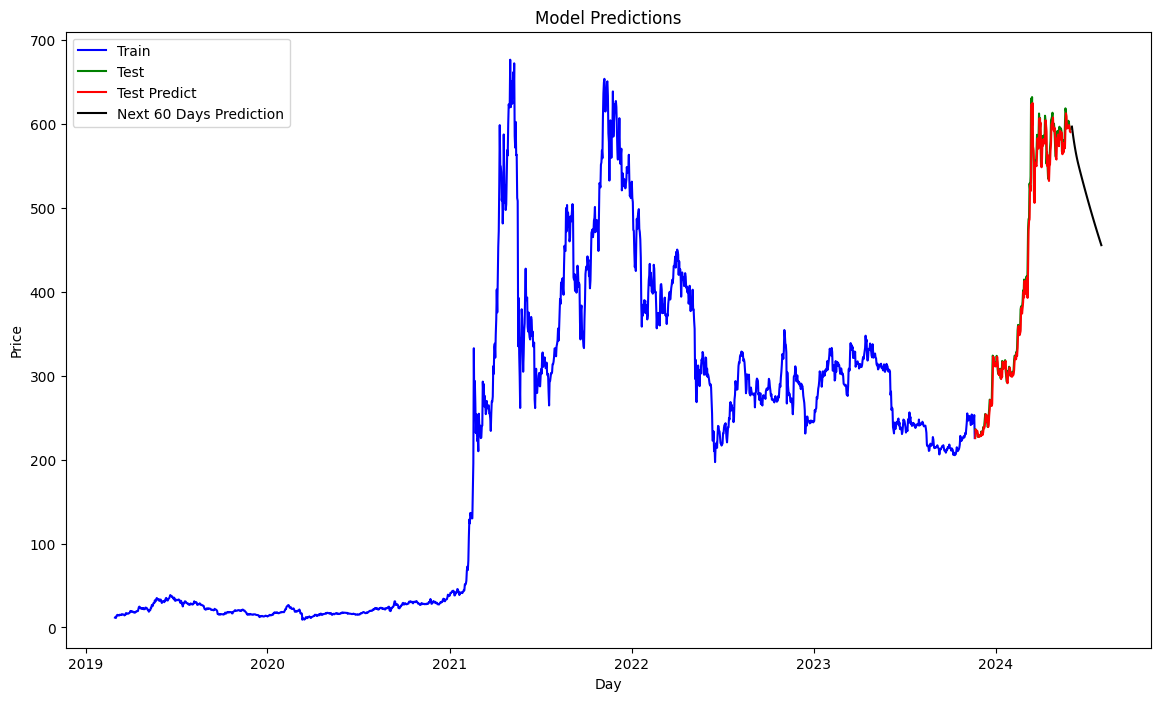

In [32]:

y_train_BNBCoin_91_inv = scaler.inverse_transform([y_train_BNBCoin_91])
y_pred_BNBCoin_91_inv = scaler.inverse_transform(y_pred_BNBCoin_91)
future_dates_BNBCoin_60days_91 = pd.date_range(start=BNBCoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_91):(len(X_train_BNBCoin_91) + len(X_test_BNBCoin_91))]
plt.plot(test_index, y_test_BNBCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_60days_91, predictions_BNBCoin_60days_91_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [33]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_BNBCoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_BNBCoin_90days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━

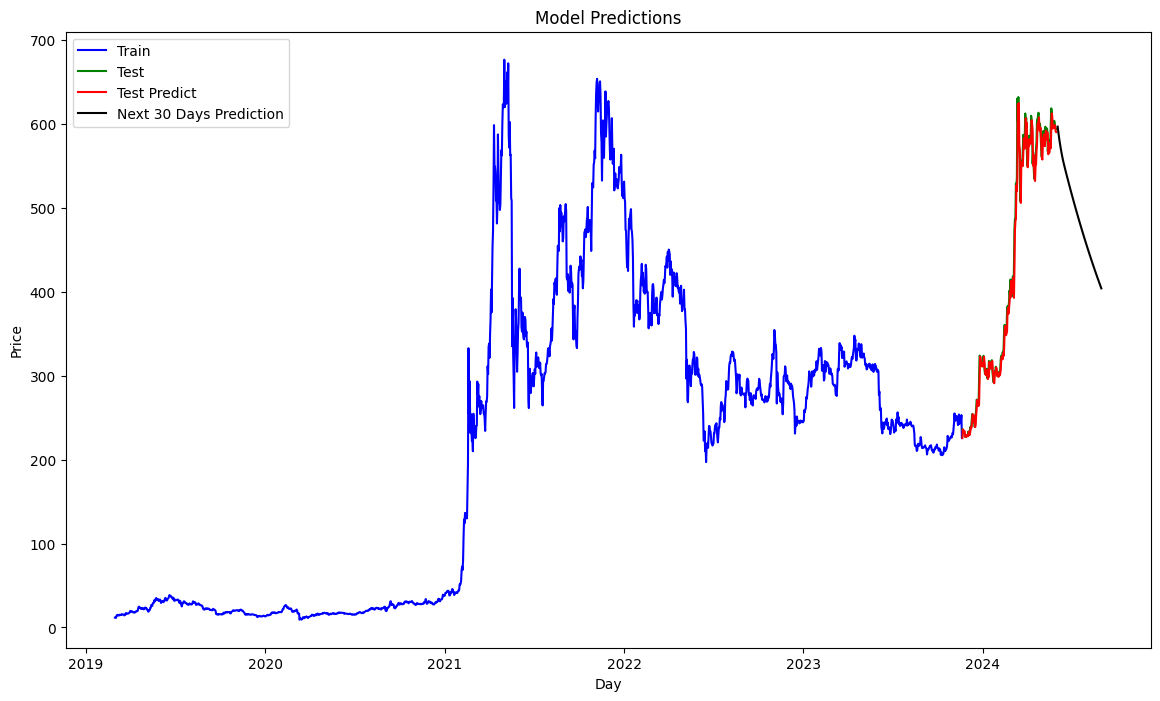

In [34]:

y_train_BNBCoin_91_inv = scaler.inverse_transform([y_train_BNBCoin_91])
y_pred_BNBCoin_91_inv = scaler.inverse_transform(y_pred_BNBCoin_91)
future_dates_BNBCoin_90days_91 = pd.date_range(start=BNBCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_91):(len(X_train_BNBCoin_91) + len(X_test_BNBCoin_91))]
plt.plot(test_index, y_test_BNBCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_90days_91, predictions_BNBCoin_90days_91_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


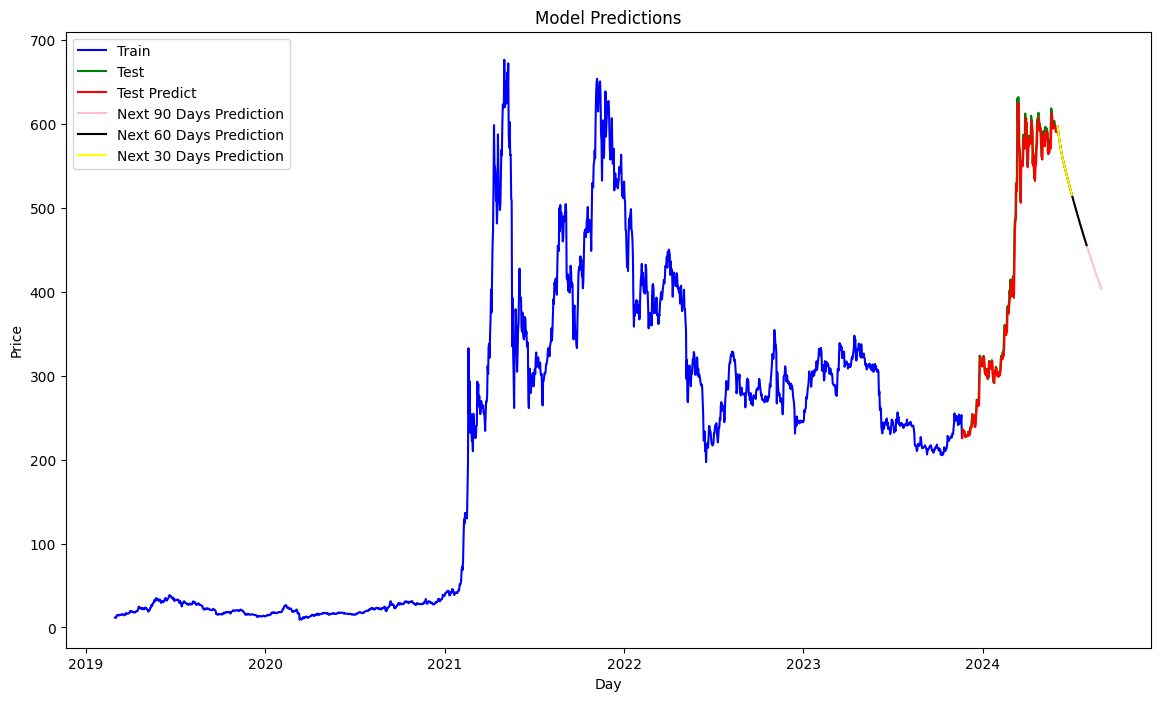

In [35]:

y_train_BNBCoin_91_inv = scaler.inverse_transform([y_train_BNBCoin_91])
y_pred_BNBCoin_91_inv = scaler.inverse_transform(y_pred_BNBCoin_91)
future_dates = pd.date_range(start=BNBCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = BNBCoindata.index[:len(X_train_BNBCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_BNBCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = BNBCoindata.index[len(X_train_BNBCoin_91):(len(X_train_BNBCoin_91) + len(X_test_BNBCoin_91))]
plt.plot(test_index, y_test_BNBCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_BNBCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_BNBCoin_90days_91, predictions_BNBCoin_90days_91_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_BNBCoin_60days_91, predictions_BNBCoin_60days_91_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_BNBCoin_30days_91, predictions_BNBCoin_30days_91_inv , label='Next 30 Days Prediction', color='yellow')


plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [36]:
y_pred_BNBCoin_91_inv = scaler.inverse_transform([y_pred_BNBCoin_91.flatten()])
# Tính toán MSE và MAPE
mse_91 = mean_squared_error(y_test_BNBCoin_91_inv[0], y_pred_BNBCoin_91_inv[0])
rmse_91 = np.sqrt(mse_91)
mape_91 = mean_absolute_percentage_error(y_test_BNBCoin_91_inv[0], y_pred_BNBCoin_91_inv[0])
print(f"MSE: {mse_91}")
print(f"RMSE: {rmse_91}")
print(f"MAPE: {mape_91}")


MSE: 236.1191887662903
RMSE: 15.366170269988885
MAPE: 0.021677744323210568


# DOGE Coin

## Devide data 8:2

In [37]:
DOGECoin = pd.read_csv('D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/Dogecoin Historical Data.csv')

In [38]:
# Chọn cột "Date" và "Price"
DOGECoindata = DOGECoin[['Date', 'Price']]

# Chuyển cột "Date" thành chỉ số
DOGECoindata['Date'] = pd.to_datetime(DOGECoindata['Date'])
DOGECoindata.set_index('Date', inplace=True)
DOGECoindata.sort_values('Date', inplace=True)
# Chuẩn hóa Price trị
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(DOGECoindata)

# Chuẩn bị dữ liệu cho MLP
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)

C:\Users\Rua\AppData\Local\Temp\ipykernel_26332\3443689853.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DOGECoindata['Date'] = pd.to_datetime(DOGECoindata['Date'])
C:\Users\Rua\AppData\Local\Temp\ipykernel_26332\3443689853.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DOGECoindata.sort_values('Date', inplace=True)


In [39]:

X_train_DOGECoin_82, X_test_DOGECoin_82, y_train_DOGECoin_82, y_test_DOGECoin_82 = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_DOGECoin_82 = np.reshape(X_train_DOGECoin_82, (X_train_DOGECoin_82.shape[0], X_train_DOGECoin_82.shape[1], 1))
X_test_DOGECoin_82 = np.reshape(X_test_DOGECoin_82, (X_test_DOGECoin_82.shape[0], X_test_DOGECoin_82.shape[1], 1))


Build and fit model MLP

In [40]:
MLP_Model_DOGECoin_82 = Sequential()
MLP_Model_DOGECoin_82.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_DOGECoin_82.add(Dense(64, activation='relu'))
MLP_Model_DOGECoin_82.add(Dense(32, activation='relu'))
MLP_Model_DOGECoin_82.add(Dense(1))
MLP_Model_DOGECoin_82.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_DOGECoin_82.summary()
MLP_Model_DOGECoin_82.fit(X_train_DOGECoin_82, y_train_DOGECoin_82, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 - 1s - 22ms/step - loss: 0.0302
Epoch 2/100
24/24 - 0s - 1ms/step - loss: 0.0111
Epoch 3/100
24/24 - 0s - 1ms/step - loss: 0.0039
Epoch 4/100
24/24 - 0s - 1ms/step - loss: 0.0011
Epoch 5/100
24/24 - 0s - 1ms/step - loss: 5.1999e-04
Epoch 6/100
24/24 - 0s - 1ms/step - loss: 4.7411e-04
Epoch 7/100
24/24 - 0s - 1ms/step - loss: 4.5520e-04
Epoch 8/100
24/24 - 0s - 1ms/step - loss: 4.5054e-04
Epoch 9/100
24/24 - 0s - 1ms/step - loss: 4.4391e-04
Epoch 10/100
24/24 - 0s - 1ms/step - loss: 4.4174e-04
Epoch 11/100
24/24 - 0s - 1ms/step - loss: 4.5645e-04
Epoch 12/100
24/24 - 0s - 1ms/step - loss: 4.4066e-04
Epoch 13/100
24/24 - 0s - 1ms/step - loss: 4.3814e-04
Epoch 14/100
24/24 - 0s - 1ms/step - loss: 4.4040e-04
Epoch 15/100
24/24 - 0s - 1ms/step - loss: 4.4177e-04
Epoch 16/100
24/24 - 0s - 1ms/step - loss: 4.4328e-04
Epoch 17/100
24/24 - 0s - 1ms/step - loss: 4.4055e-04
Epoch 18/100
24/24 - 0s - 1ms/step - loss: 4.3815e-04
Epoch 19/100
24/24 - 0s - 1ms/step - loss: 4.3572e-0

Predict in test

In [41]:
y_pred_DOGECoin_82 = MLP_Model_DOGECoin_82.predict(X_test_DOGECoin_82)
y_test_DOGECoin_82_inv = scaler.inverse_transform([y_test_DOGECoin_82])
y_pred_DOGECoin_82_inv = scaler.inverse_transform([y_pred_DOGECoin_82.flatten()])


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Predict 30 days

In [42]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_30days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━

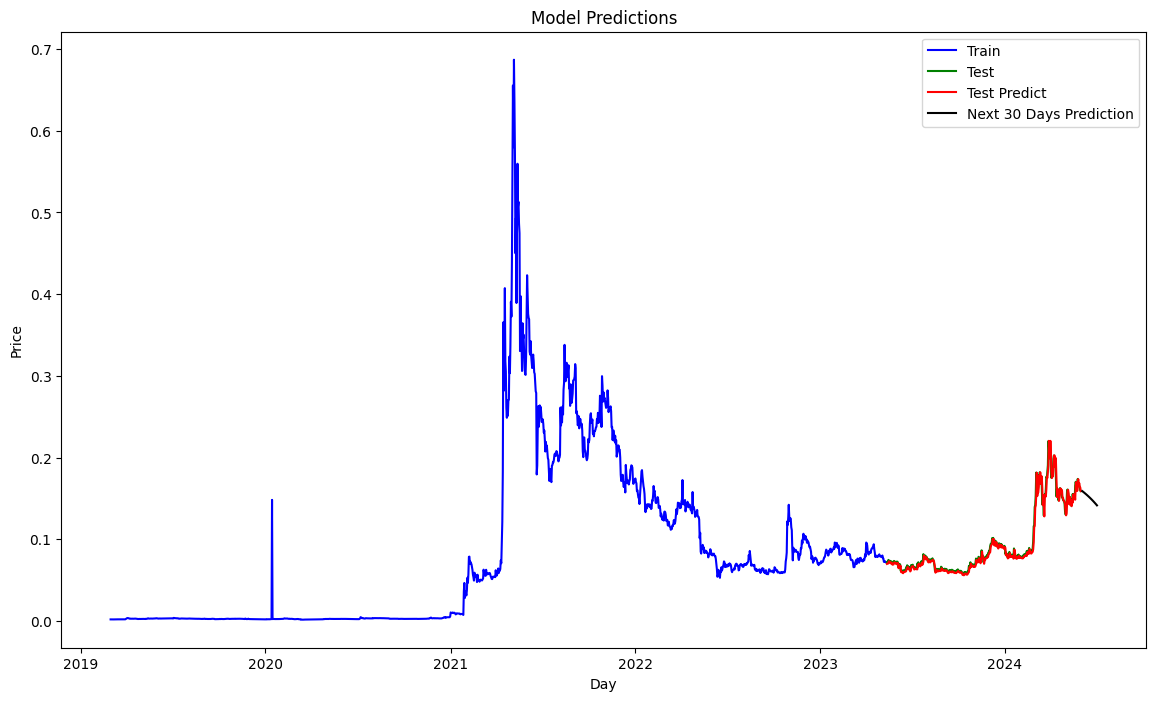

In [43]:

y_train_DOGECoin_82_inv = scaler.inverse_transform([y_train_DOGECoin_82])
y_pred_DOGECoin_82_inv = scaler.inverse_transform(y_pred_DOGECoin_82)
future_dates_DOGECoin_30days_82 = pd.date_range(start=DOGECoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_82):(len(X_train_DOGECoin_82) + len(X_test_DOGECoin_82))]
plt.plot(test_index, y_test_DOGECoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_30days_82, predictions_DOGECoin_30days_82_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [44]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_60days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━

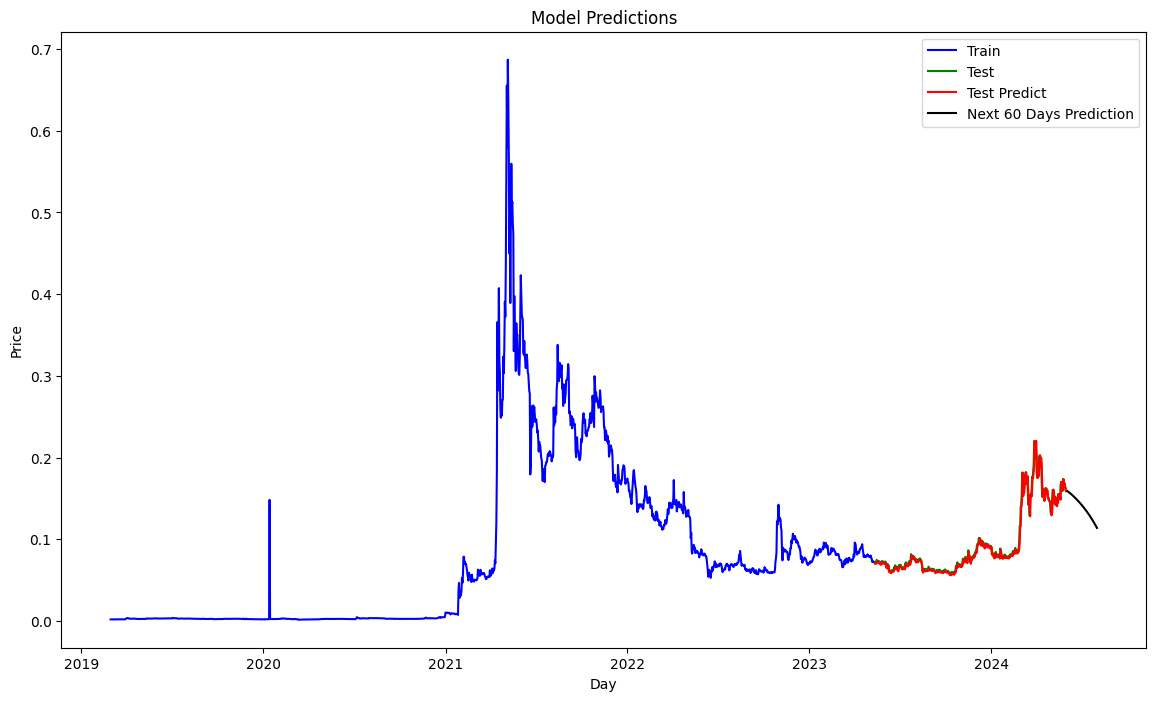

In [45]:

y_train_DOGECoin_82_inv = scaler.inverse_transform([y_train_DOGECoin_82])
y_pred_DOGECoin_82_inv = scaler.inverse_transform(y_pred_DOGECoin_82)
future_dates_DOGECoin_60days_82 = pd.date_range(start=DOGECoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_82):(len(X_train_DOGECoin_82) + len(X_test_DOGECoin_82))]
plt.plot(test_index, y_test_DOGECoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_60days_82, predictions_DOGECoin_60days_82_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [46]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_90days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━

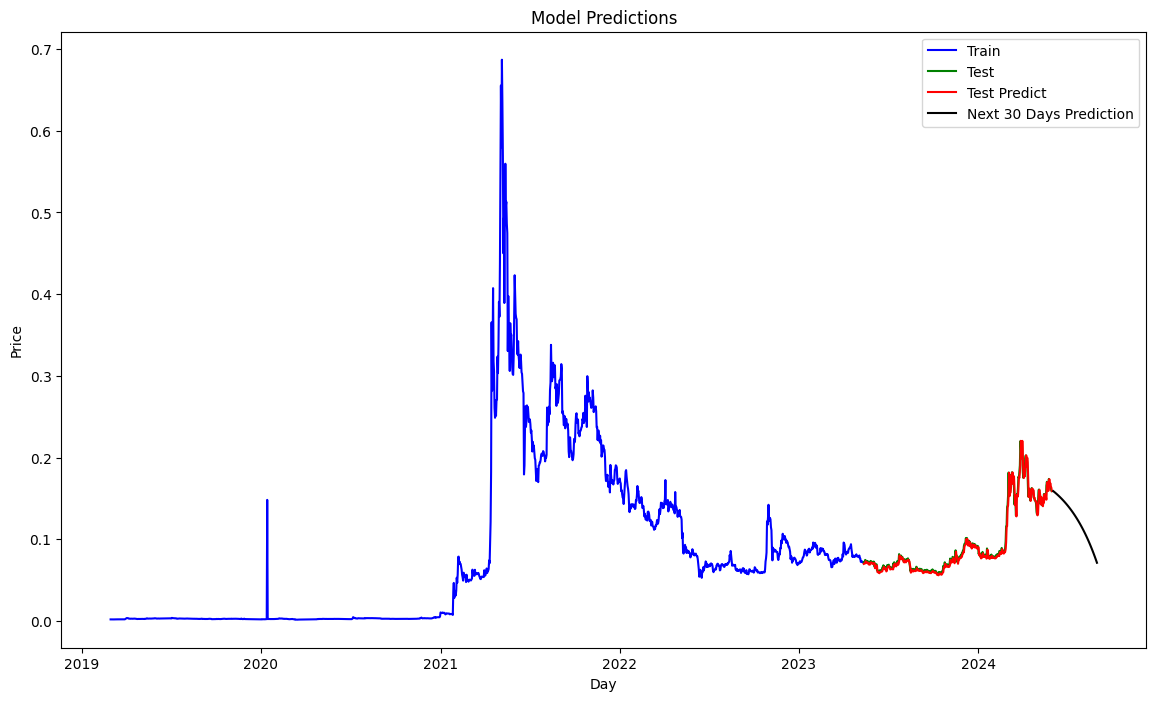

In [47]:

y_train_DOGECoin_82_inv = scaler.inverse_transform([y_train_DOGECoin_82])
y_pred_DOGECoin_82_inv = scaler.inverse_transform(y_pred_DOGECoin_82)
future_dates_DOGECoin_90days_82 = pd.date_range(start=DOGECoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_82):(len(X_train_DOGECoin_82) + len(X_test_DOGECoin_82))]
plt.plot(test_index, y_test_DOGECoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_90days_82, predictions_DOGECoin_90days_82_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


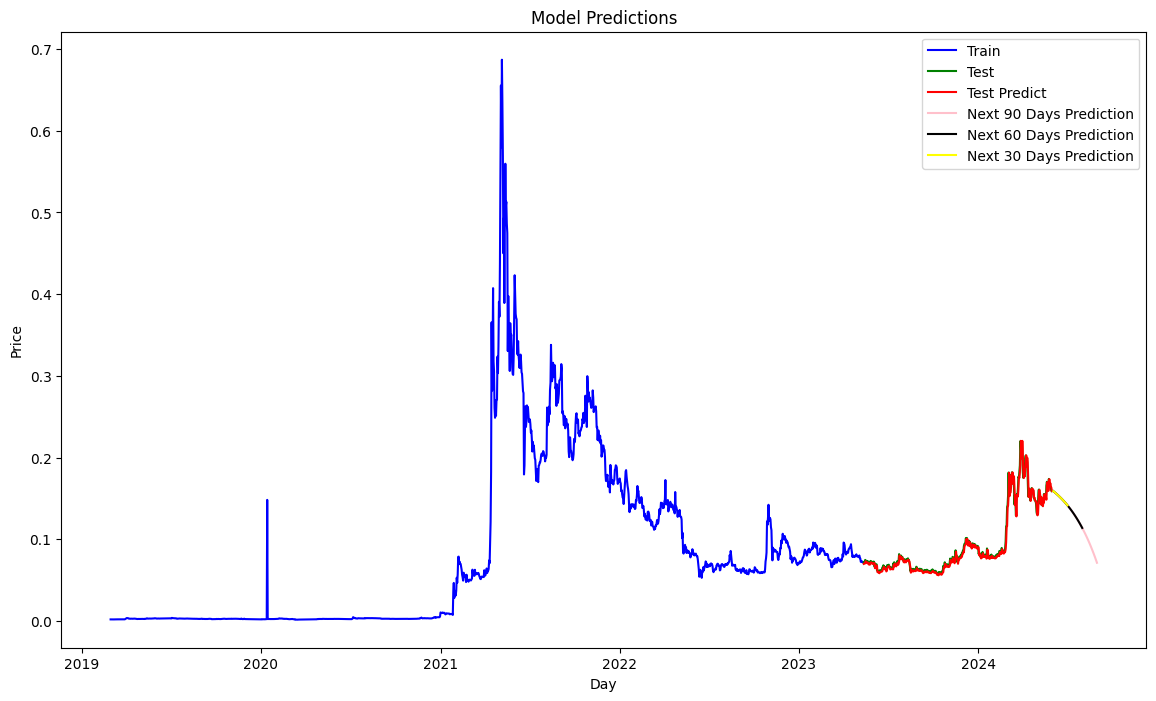

In [48]:

y_train_DOGECoin_82_inv = scaler.inverse_transform([y_train_DOGECoin_82])
y_pred_DOGECoin_82_inv = scaler.inverse_transform(y_pred_DOGECoin_82)
future_dates = pd.date_range(start=DOGECoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_82):(len(X_train_DOGECoin_82) + len(X_test_DOGECoin_82))]
plt.plot(test_index, y_test_DOGECoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_90days_82, predictions_DOGECoin_90days_82_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_DOGECoin_60days_82, predictions_DOGECoin_60days_82_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_DOGECoin_30days_82, predictions_DOGECoin_30days_82_inv , label='Next 30 Days Prediction', color='yellow')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [49]:
y_pred_DOGECoin_82_inv = scaler.inverse_transform([y_pred_DOGECoin_82.flatten()])
# Tính toán MSE và MAPE
mse_82 = mean_squared_error(y_test_DOGECoin_82_inv[0], y_pred_DOGECoin_82_inv[0])
rmse_82 = np.sqrt(mse_82)
mape_82 = mean_absolute_percentage_error(y_test_DOGECoin_82_inv[0], y_pred_DOGECoin_82_inv[0])
print(f"MSE: {mse_82}")
print(f"RMSE: {rmse_82}")
print(f"MAPE: {mape_82}")


MSE: 3.6699603900236196e-05
RMSE: 0.00605801980025125
MAPE: 0.03728985984296532


## Devide data 7:3

In [50]:

X_train_DOGECoin_73, X_test_DOGECoin_73, y_train_DOGECoin_73, y_test_DOGECoin_73 = train_test_split(X, Y, test_size=0.3, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_DOGECoin_73 = np.reshape(X_train_DOGECoin_73, (X_train_DOGECoin_73.shape[0], X_train_DOGECoin_73.shape[1], 1))
X_test_DOGECoin_73 = np.reshape(X_test_DOGECoin_73, (X_test_DOGECoin_73.shape[0], X_test_DOGECoin_73.shape[1], 1))


Build and fit model MLP

In [51]:
MLP_Model_DOGECoin_73 = Sequential()
MLP_Model_DOGECoin_73.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_DOGECoin_73.add(Dense(64, activation='relu'))
MLP_Model_DOGECoin_73.add(Dense(32, activation='relu'))
MLP_Model_DOGECoin_73.add(Dense(1))
MLP_Model_DOGECoin_73.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_DOGECoin_73.summary()
MLP_Model_DOGECoin_73.fit(X_train_DOGECoin_73, y_train_DOGECoin_73, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
21/21 - 1s - 34ms/step - loss: 0.0104
Epoch 2/100
21/21 - 0s - 1ms/step - loss: 0.0027
Epoch 3/100
21/21 - 0s - 1ms/step - loss: 5.7699e-04
Epoch 4/100
21/21 - 0s - 746us/step - loss: 5.2223e-04
Epoch 5/100
21/21 - 0s - 744us/step - loss: 5.0029e-04
Epoch 6/100
21/21 - 0s - 2ms/step - loss: 5.0370e-04
Epoch 7/100
21/21 - 0s - 1ms/step - loss: 5.0371e-04
Epoch 8/100
21/21 - 0s - 744us/step - loss: 5.0178e-04
Epoch 9/100
21/21 - 0s - 1ms/step - loss: 5.0391e-04
Epoch 10/100
21/21 - 0s - 1ms/step - loss: 4.9904e-04
Epoch 11/100
21/21 - 0s - 1ms/step - loss: 5.0426e-04
Epoch 12/100
21/21 - 0s - 1ms/step - loss: 5.2576e-04
Epoch 13/100
21/21 - 0s - 1ms/step - loss: 5.0534e-04
Epoch 14/100
21/21 - 0s - 1ms/step - loss: 5.0210e-04
Epoch 15/100
21/21 - 0s - 1ms/step - loss: 5.0575e-04
Epoch 16/100
21/21 - 0s - 1ms/step - loss: 4.9985e-04
Epoch 17/100
21/21 - 0s - 1ms/step - loss: 5.0849e-04
Epoch 18/100
21/21 - 0s - 1ms/step - loss: 5.2841e-04
Epoch 19/100
21/21 - 0s - 1ms/step - l

Predict in test

In [52]:
y_pred_DOGECoin_73 = MLP_Model_DOGECoin_73.predict(X_test_DOGECoin_73)
y_test_DOGECoin_73_inv = scaler.inverse_transform([y_test_DOGECoin_73])
y_pred_DOGECoin_73_inv = scaler.inverse_transform([y_pred_DOGECoin_73.flatten()])


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Predict 30 days

In [53]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_30days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

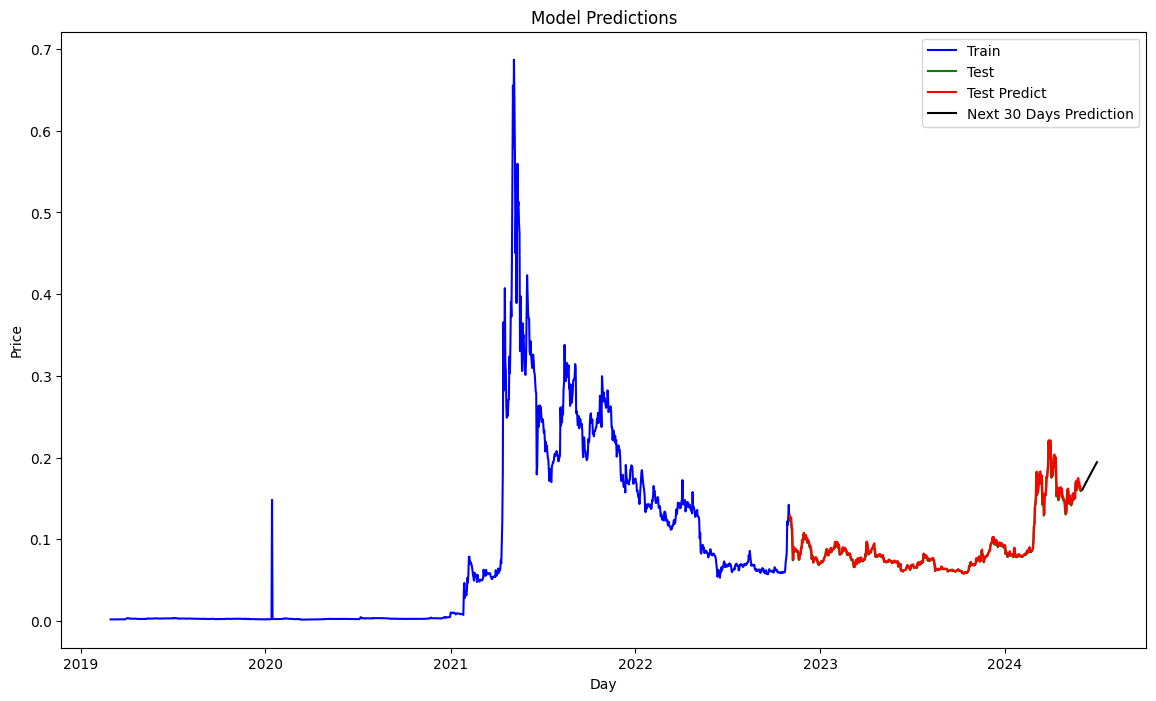

In [54]:

y_train_DOGECoin_73_inv = scaler.inverse_transform([y_train_DOGECoin_73])
y_pred_DOGECoin_73_inv = scaler.inverse_transform(y_pred_DOGECoin_73)
future_dates_DOGECoin_30days_73 = pd.date_range(start=DOGECoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_73):(len(X_train_DOGECoin_73) + len(X_test_DOGECoin_73))]
plt.plot(test_index, y_test_DOGECoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_30days_73, predictions_DOGECoin_30days_73_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [55]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_60days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

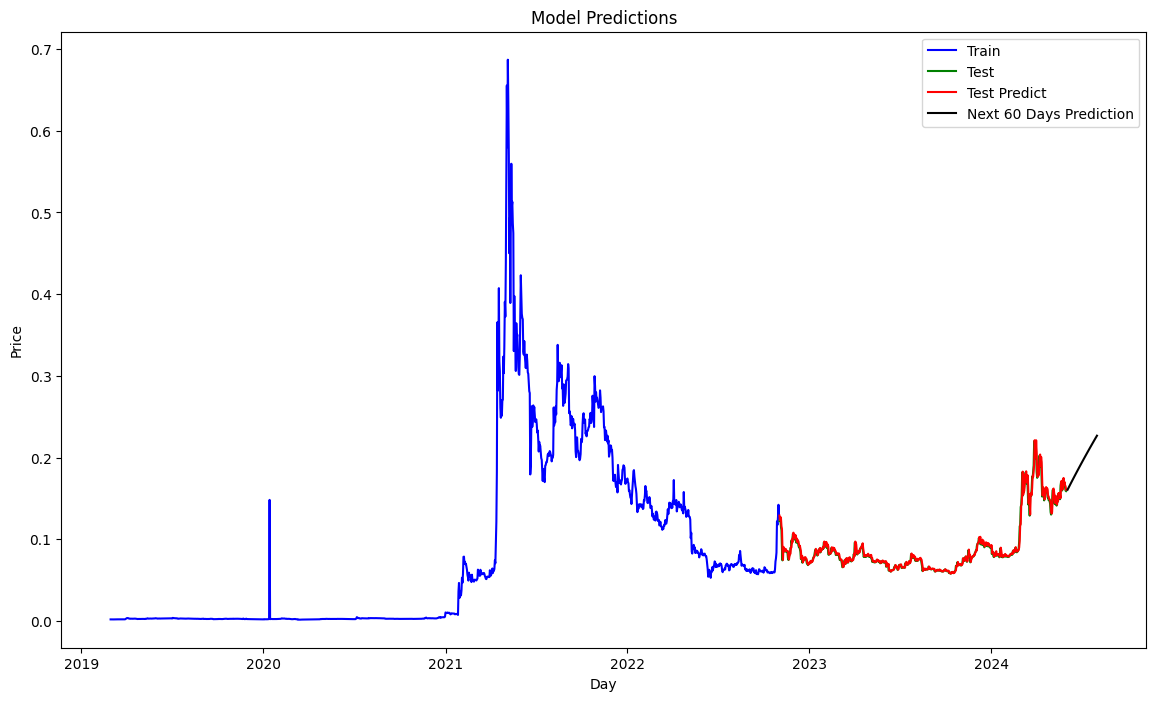

In [56]:

y_train_DOGECoin_73_inv = scaler.inverse_transform([y_train_DOGECoin_73])
y_pred_DOGECoin_73_inv = scaler.inverse_transform(y_pred_DOGECoin_73)
future_dates_DOGECoin_60days_73 = pd.date_range(start=DOGECoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_73):(len(X_train_DOGECoin_73) + len(X_test_DOGECoin_73))]
plt.plot(test_index, y_test_DOGECoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_60days_73, predictions_DOGECoin_60days_73_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [57]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_90days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━

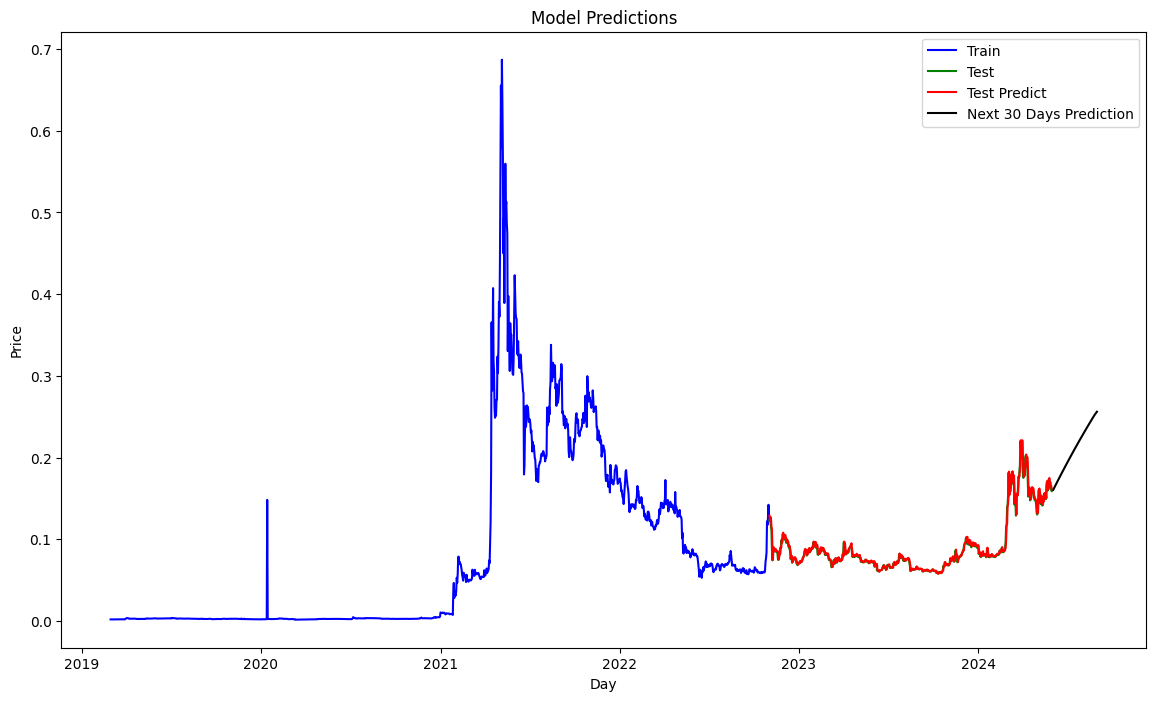

In [58]:

y_train_DOGECoin_73_inv = scaler.inverse_transform([y_train_DOGECoin_73])
y_pred_DOGECoin_73_inv = scaler.inverse_transform(y_pred_DOGECoin_73)
future_dates_DOGECoin_90days_73 = pd.date_range(start=DOGECoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_73):(len(X_train_DOGECoin_73) + len(X_test_DOGECoin_73))]
plt.plot(test_index, y_test_DOGECoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_90days_73, predictions_DOGECoin_90days_73_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


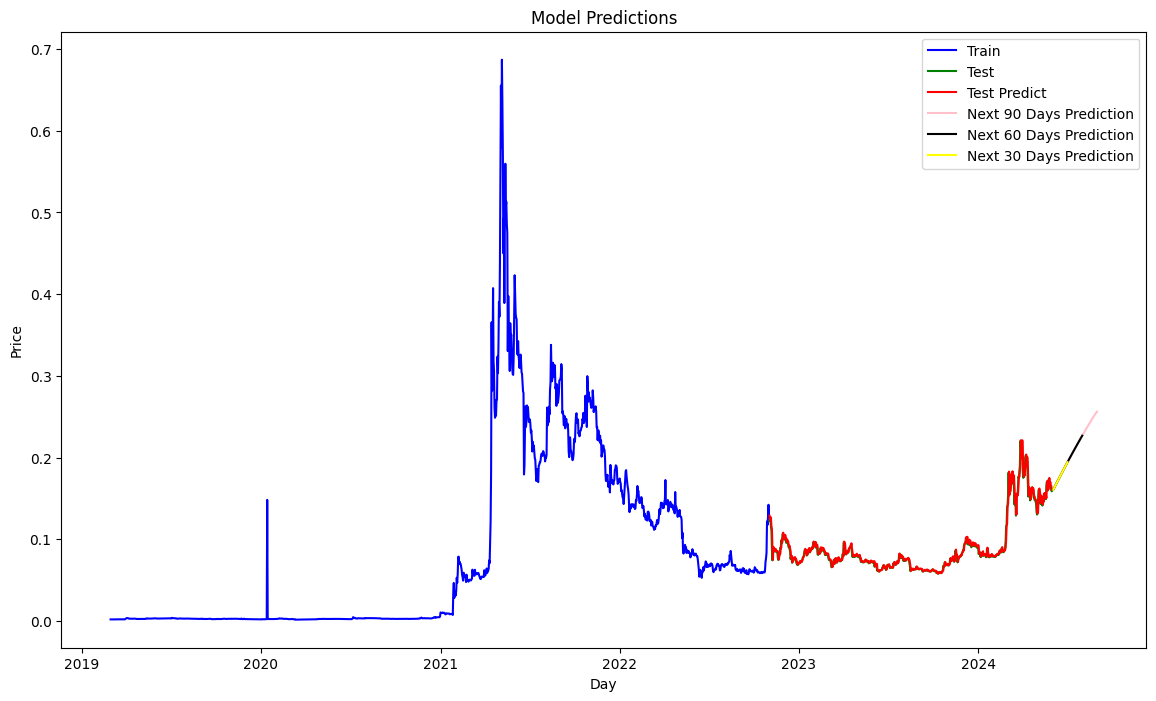

In [59]:

y_train_DOGECoin_73_inv = scaler.inverse_transform([y_train_DOGECoin_73])
y_pred_DOGECoin_73_inv = scaler.inverse_transform(y_pred_DOGECoin_73)
future_dates = pd.date_range(start=DOGECoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_73):(len(X_train_DOGECoin_73) + len(X_test_DOGECoin_73))]
plt.plot(test_index, y_test_DOGECoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_90days_73, predictions_DOGECoin_90days_73_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_DOGECoin_60days_73, predictions_DOGECoin_60days_73_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_DOGECoin_30days_73, predictions_DOGECoin_30days_73_inv , label='Next 30 Days Prediction', color='yellow')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [60]:
y_pred_DOGECoin_73_inv = scaler.inverse_transform([y_pred_DOGECoin_73.flatten()])
# Tính toán MSE và MAPE
mse_73 = mean_squared_error(y_test_DOGECoin_73_inv[0], y_pred_DOGECoin_73_inv[0])
rmse_73 = np.sqrt(mse_73)
mape_73 = mean_absolute_percentage_error(y_test_DOGECoin_73_inv[0], y_pred_DOGECoin_73_inv[0])
print(f"MSE: {mse_73}")
print(f"RMSE: {rmse_73}")
print(f"MAPE: {mape_73}")


MSE: 2.8225298273997943e-05
RMSE: 0.005312748655262918
MAPE: 0.03096910063111073


## Devide data 9:1

In [61]:

X_train_DOGECoin_91, X_test_DOGECoin_91, y_train_DOGECoin_91, y_test_DOGECoin_91 = train_test_split(X, Y, test_size=0.1, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_DOGECoin_91 = np.reshape(X_train_DOGECoin_91, (X_train_DOGECoin_91.shape[0], X_train_DOGECoin_91.shape[1], 1))
X_test_DOGECoin_91 = np.reshape(X_test_DOGECoin_91, (X_test_DOGECoin_91.shape[0], X_test_DOGECoin_91.shape[1], 1))


Build and fit model MLP

In [62]:
MLP_Model_DOGECoin_91 = Sequential()
MLP_Model_DOGECoin_91.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_DOGECoin_91.add(Dense(64, activation='relu'))
MLP_Model_DOGECoin_91.add(Dense(32, activation='relu'))
MLP_Model_DOGECoin_91.add(Dense(1))
MLP_Model_DOGECoin_91.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_DOGECoin_91.summary()
MLP_Model_DOGECoin_91.fit(X_train_DOGECoin_91, y_train_DOGECoin_91, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
27/27 - 1s - 20ms/step - loss: 0.0191
Epoch 2/100
27/27 - 0s - 1ms/step - loss: 0.0056
Epoch 3/100
27/27 - 0s - 1ms/step - loss: 0.0012
Epoch 4/100
27/27 - 0s - 1ms/step - loss: 5.0185e-04
Epoch 5/100
27/27 - 0s - 1ms/step - loss: 4.3543e-04
Epoch 6/100
27/27 - 0s - 1ms/step - loss: 4.1247e-04
Epoch 7/100
27/27 - 0s - 1ms/step - loss: 4.0058e-04
Epoch 8/100
27/27 - 0s - 1ms/step - loss: 3.9773e-04
Epoch 9/100
27/27 - 0s - 1ms/step - loss: 3.9292e-04
Epoch 10/100
27/27 - 0s - 1ms/step - loss: 4.0927e-04
Epoch 11/100
27/27 - 0s - 1ms/step - loss: 4.0922e-04
Epoch 12/100
27/27 - 0s - 1ms/step - loss: 4.0031e-04
Epoch 13/100
27/27 - 0s - 1ms/step - loss: 3.9574e-04
Epoch 14/100
27/27 - 0s - 1ms/step - loss: 3.9433e-04
Epoch 15/100
27/27 - 0s - 1ms/step - loss: 3.9630e-04
Epoch 16/100
27/27 - 0s - 1ms/step - loss: 3.9162e-04
Epoch 17/100
27/27 - 0s - 1ms/step - loss: 3.8963e-04
Epoch 18/100
27/27 - 0s - 1ms/step - loss: 3.9525e-04
Epoch 19/100
27/27 - 0s - 1ms/step - loss: 3.909

Predict in test

In [63]:
y_pred_DOGECoin_91 = MLP_Model_DOGECoin_91.predict(X_test_DOGECoin_91)
y_test_DOGECoin_91_inv = scaler.inverse_transform([y_test_DOGECoin_91])
y_pred_DOGECoin_91_inv = scaler.inverse_transform([y_pred_DOGECoin_91.flatten()])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Predict 30 days

In [64]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_30days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━

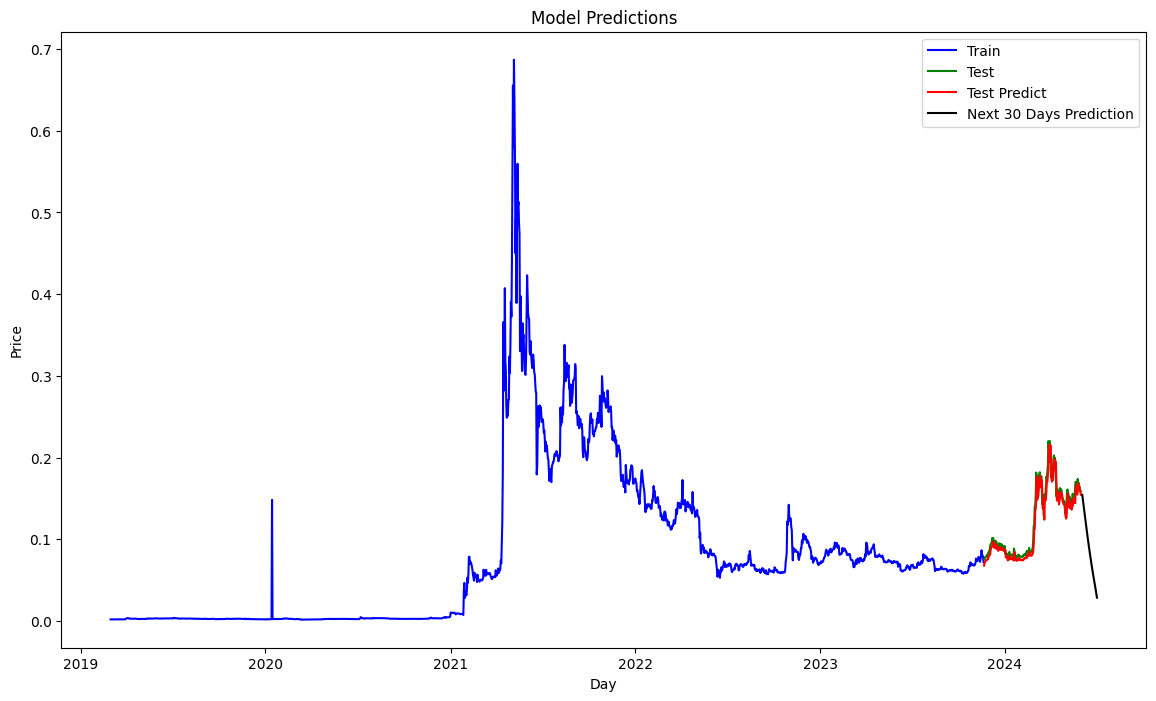

In [65]:

y_train_DOGECoin_91_inv = scaler.inverse_transform([y_train_DOGECoin_91])
y_pred_DOGECoin_91_inv = scaler.inverse_transform(y_pred_DOGECoin_91)
future_dates_DOGECoin_30days_91 = pd.date_range(start=DOGECoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_91):(len(X_train_DOGECoin_91) + len(X_test_DOGECoin_91))]
plt.plot(test_index, y_test_DOGECoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_30days_91, predictions_DOGECoin_30days_91_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [66]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_60days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

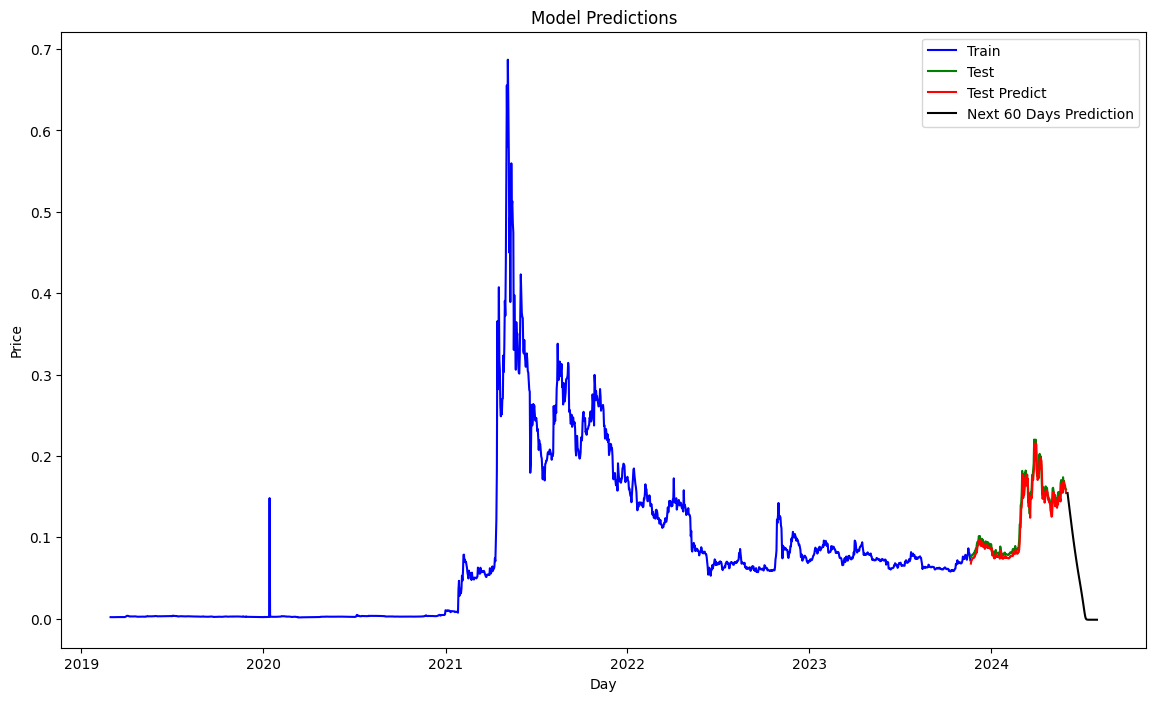

In [67]:

y_train_DOGECoin_91_inv = scaler.inverse_transform([y_train_DOGECoin_91])
y_pred_DOGECoin_91_inv = scaler.inverse_transform(y_pred_DOGECoin_91)
future_dates_DOGECoin_60days_91 = pd.date_range(start=DOGECoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_91):(len(X_train_DOGECoin_91) + len(X_test_DOGECoin_91))]
plt.plot(test_index, y_test_DOGECoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_60days_91, predictions_DOGECoin_60days_91_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [68]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_DOGECoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_DOGECoin_90days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

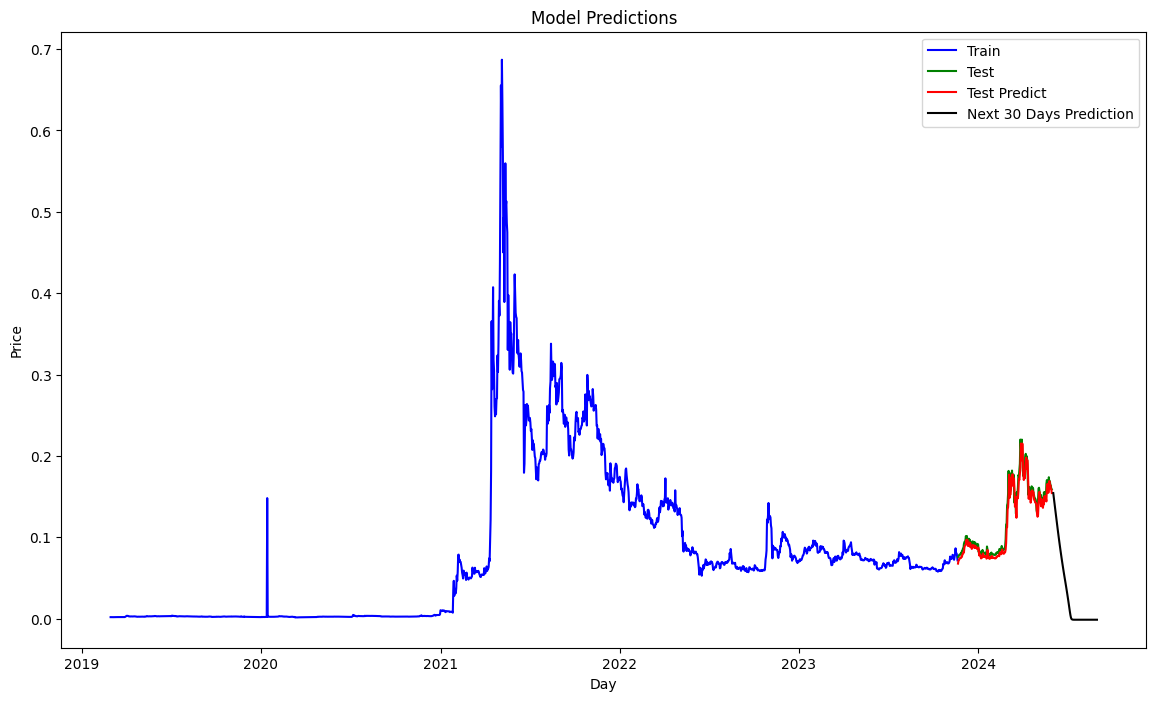

In [69]:

y_train_DOGECoin_91_inv = scaler.inverse_transform([y_train_DOGECoin_91])
y_pred_DOGECoin_91_inv = scaler.inverse_transform(y_pred_DOGECoin_91)
future_dates_DOGECoin_90days_91 = pd.date_range(start=DOGECoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_91):(len(X_train_DOGECoin_91) + len(X_test_DOGECoin_91))]
plt.plot(test_index, y_test_DOGECoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_90days_91, predictions_DOGECoin_90days_91_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


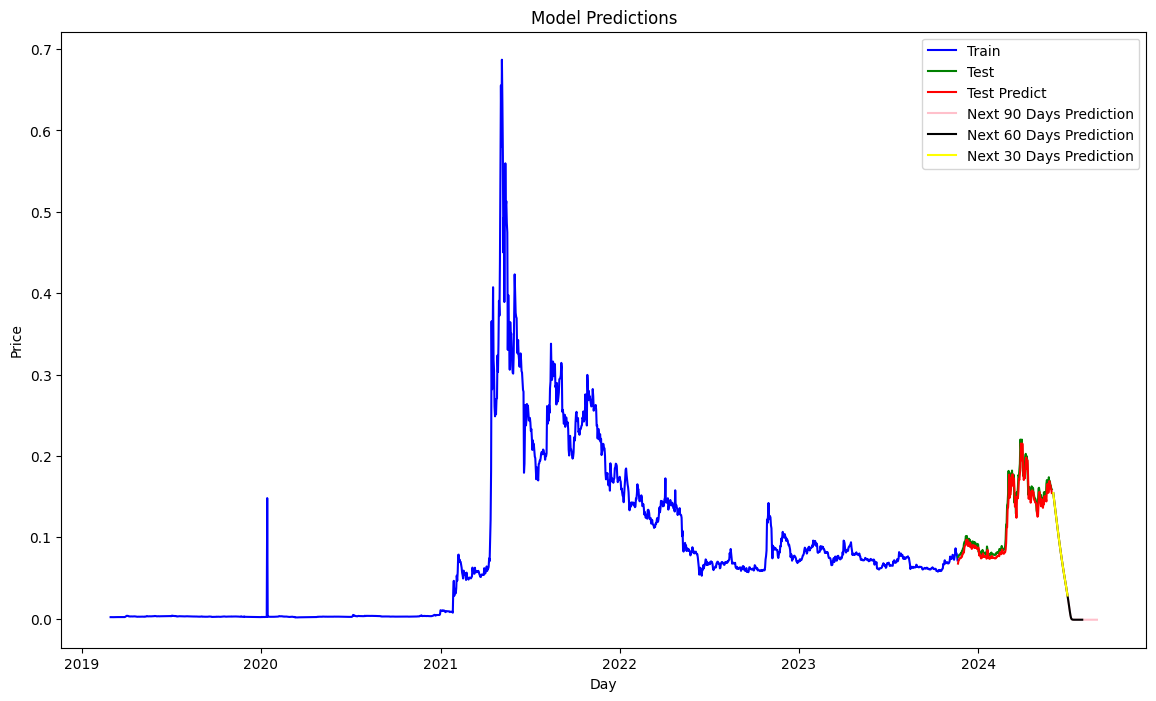

In [70]:

y_train_DOGECoin_91_inv = scaler.inverse_transform([y_train_DOGECoin_91])
y_pred_DOGECoin_91_inv = scaler.inverse_transform(y_pred_DOGECoin_91)
future_dates = pd.date_range(start=DOGECoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = DOGECoindata.index[:len(X_train_DOGECoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_DOGECoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = DOGECoindata.index[len(X_train_DOGECoin_91):(len(X_train_DOGECoin_91) + len(X_test_DOGECoin_91))]
plt.plot(test_index, y_test_DOGECoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_DOGECoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_DOGECoin_90days_91, predictions_DOGECoin_90days_91_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_DOGECoin_60days_91, predictions_DOGECoin_60days_91_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_DOGECoin_30days_91, predictions_DOGECoin_30days_91_inv , label='Next 30 Days Prediction', color='yellow')


plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [71]:
y_pred_DOGECoin_91_inv = scaler.inverse_transform([y_pred_DOGECoin_91.flatten()])
# Tính toán MSE và MAPE
mse_91 = mean_squared_error(y_test_DOGECoin_91_inv[0], y_pred_DOGECoin_91_inv[0])
rmse_91 = np.sqrt(mse_91)
mape_91 = mean_absolute_percentage_error(y_test_DOGECoin_91_inv[0], y_pred_DOGECoin_91_inv[0])
print(f"MSE: {mse_91}")
print(f"RMSE: {rmse_91}")
print(f"MAPE: {mape_91}")


MSE: 8.780816710533537e-05
RMSE: 0.009370601213654083
MAPE: 0.056515940810382304


# TRON Coin

In [72]:
TRONCoin = pd.read_csv('D:/Dữ liệu kinh doanh/DoAn/ptdl/IS403_O22_HTCL_12/Dataset/TRON Historical Data.csv')

In [73]:


# Chọn cột "Date" và "Price"
TRONCoindata = TRONCoin[['Date', 'Price']]

# Chuyển cột "Date" thành chỉ số
TRONCoindata['Date'] = pd.to_datetime(TRONCoindata['Date'])
TRONCoindata.set_index('Date', inplace=True)
TRONCoindata.sort_values('Date', inplace=True)
# Chuẩn hóa Price trị
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(TRONCoindata)

# Chuẩn bị dữ liệu cho MLP
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 1
X, Y = create_dataset(scaled_data, look_back)

C:\Users\Rua\AppData\Local\Temp\ipykernel_26332\1053905340.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRONCoindata['Date'] = pd.to_datetime(TRONCoindata['Date'])
C:\Users\Rua\AppData\Local\Temp\ipykernel_26332\1053905340.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TRONCoindata.sort_values('Date', inplace=True)


## Devide data 8:2

In [74]:

X_train_TRONCoin_82, X_test_TRONCoin_82, y_train_TRONCoin_82, y_test_TRONCoin_82 = train_test_split(X, Y, test_size=0.2, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_TRONCoin_82 = np.reshape(X_train_TRONCoin_82, (X_train_TRONCoin_82.shape[0], X_train_TRONCoin_82.shape[1], 1))
X_test_TRONCoin_82 = np.reshape(X_test_TRONCoin_82, (X_test_TRONCoin_82.shape[0], X_test_TRONCoin_82.shape[1], 1))


Build and fit model MLP

In [75]:
MLP_Model_TRONCoin_82 = Sequential()
MLP_Model_TRONCoin_82.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_TRONCoin_82.add(Dense(64, activation='relu'))
MLP_Model_TRONCoin_82.add(Dense(32, activation='relu'))
MLP_Model_TRONCoin_82.add(Dense(1))
MLP_Model_TRONCoin_82.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_TRONCoin_82.summary()
MLP_Model_TRONCoin_82.fit(X_train_TRONCoin_82, y_train_TRONCoin_82, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
24/24 - 1s - 23ms/step - loss: 0.0421
Epoch 2/100
24/24 - 0s - 1ms/step - loss: 0.0073
Epoch 3/100
24/24 - 0s - 1ms/step - loss: 0.0041
Epoch 4/100
24/24 - 0s - 2ms/step - loss: 0.0018
Epoch 5/100
24/24 - 0s - 1ms/step - loss: 7.2469e-04
Epoch 6/100
24/24 - 0s - 1ms/step - loss: 4.6112e-04
Epoch 7/100
24/24 - 0s - 2ms/step - loss: 4.4189e-04
Epoch 8/100
24/24 - 0s - 1ms/step - loss: 4.3856e-04
Epoch 9/100
24/24 - 0s - 1ms/step - loss: 4.3846e-04
Epoch 10/100
24/24 - 0s - 1ms/step - loss: 4.3630e-04
Epoch 11/100
24/24 - 0s - 1ms/step - loss: 4.3833e-04
Epoch 12/100
24/24 - 0s - 669us/step - loss: 4.4470e-04
Epoch 13/100
24/24 - 0s - 660us/step - loss: 4.4179e-04
Epoch 14/100
24/24 - 0s - 1ms/step - loss: 4.3707e-04
Epoch 15/100
24/24 - 0s - 1ms/step - loss: 4.4017e-04
Epoch 16/100
24/24 - 0s - 1ms/step - loss: 4.4021e-04
Epoch 17/100
24/24 - 0s - 1ms/step - loss: 4.3819e-04
Epoch 18/100
24/24 - 0s - 1ms/step - loss: 4.3634e-04
Epoch 19/100
24/24 - 0s - 1ms/step - loss: 4.372

Predict in test

In [76]:
y_pred_TRONCoin_82 = MLP_Model_TRONCoin_82.predict(X_test_TRONCoin_82)
y_test_TRONCoin_82_inv = scaler.inverse_transform([y_test_TRONCoin_82])
y_pred_TRONCoin_82_inv = scaler.inverse_transform([y_pred_TRONCoin_82.flatten()])


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


Predict 30 days

In [77]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_30days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━

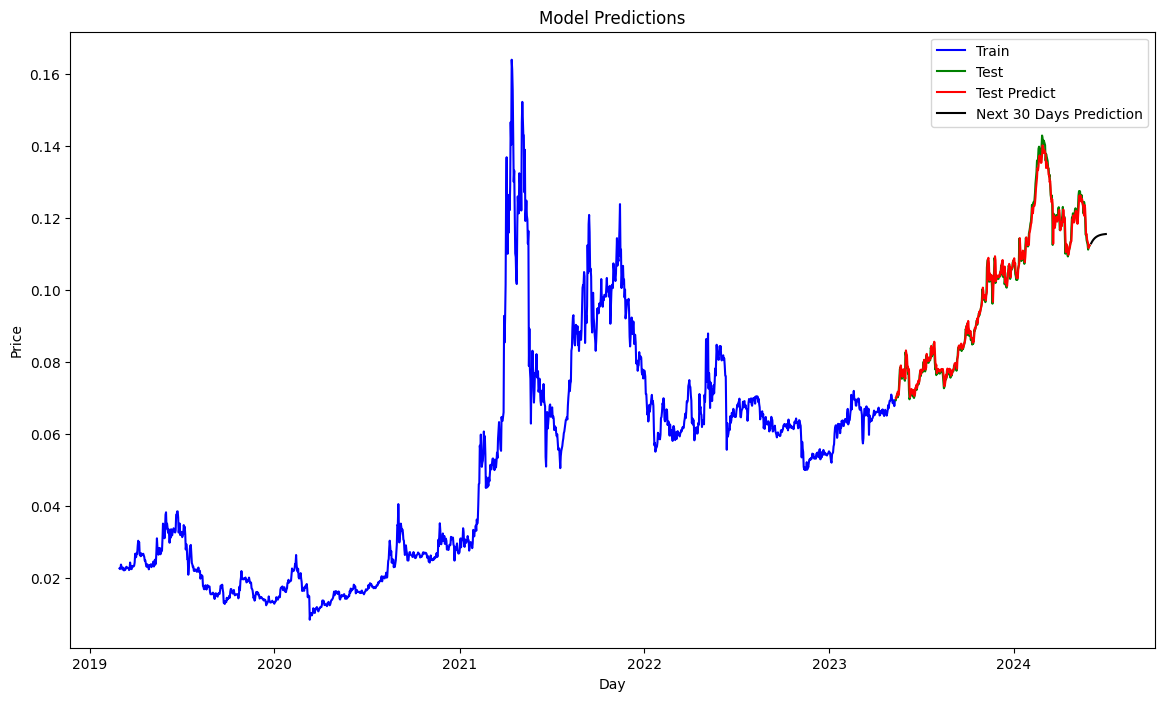

In [78]:

y_train_TRONCoin_82_inv = scaler.inverse_transform([y_train_TRONCoin_82])
y_pred_TRONCoin_82_inv = scaler.inverse_transform(y_pred_TRONCoin_82)
future_dates_TRONCoin_30days_82 = pd.date_range(start=TRONCoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_82):(len(X_train_TRONCoin_82) + len(X_test_TRONCoin_82))]
plt.plot(test_index, y_test_TRONCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_30days_82, predictions_TRONCoin_30days_82_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [79]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_60days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

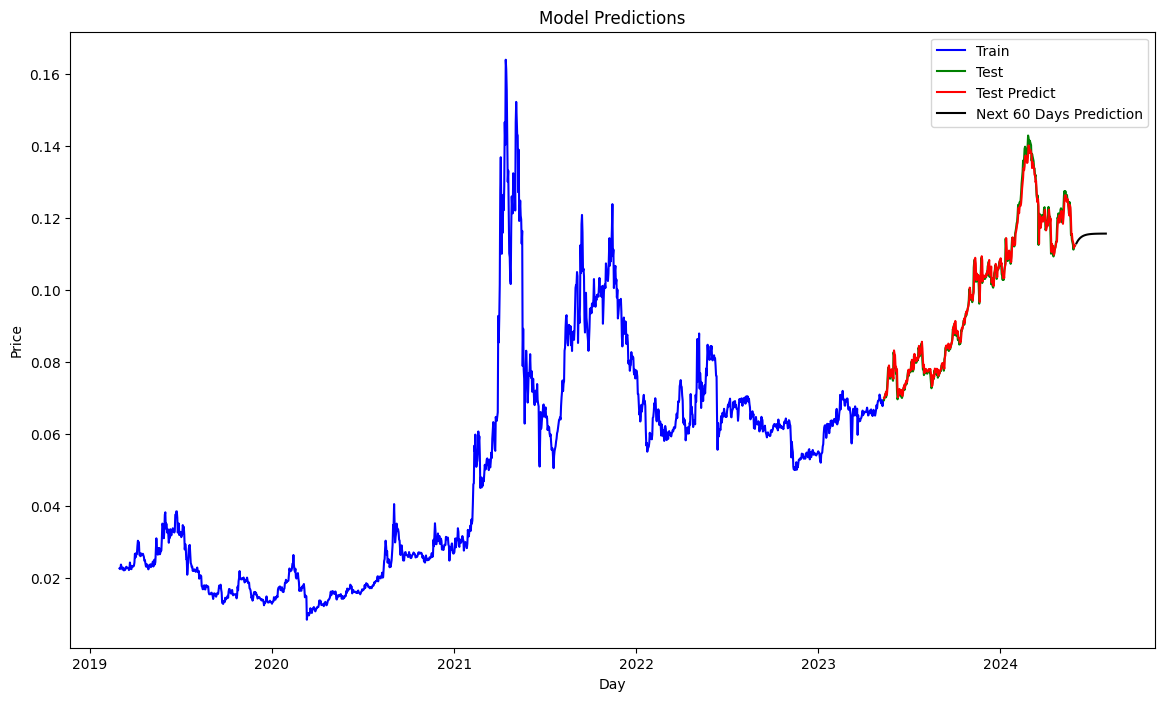

In [80]:

y_train_TRONCoin_82_inv = scaler.inverse_transform([y_train_TRONCoin_82])
y_pred_TRONCoin_82_inv = scaler.inverse_transform(y_pred_TRONCoin_82)
future_dates_TRONCoin_60days_82 = pd.date_range(start=TRONCoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_82):(len(X_train_TRONCoin_82) + len(X_test_TRONCoin_82))]
plt.plot(test_index, y_test_TRONCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_60days_82, predictions_TRONCoin_60days_82_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [81]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_82.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_90days_82_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

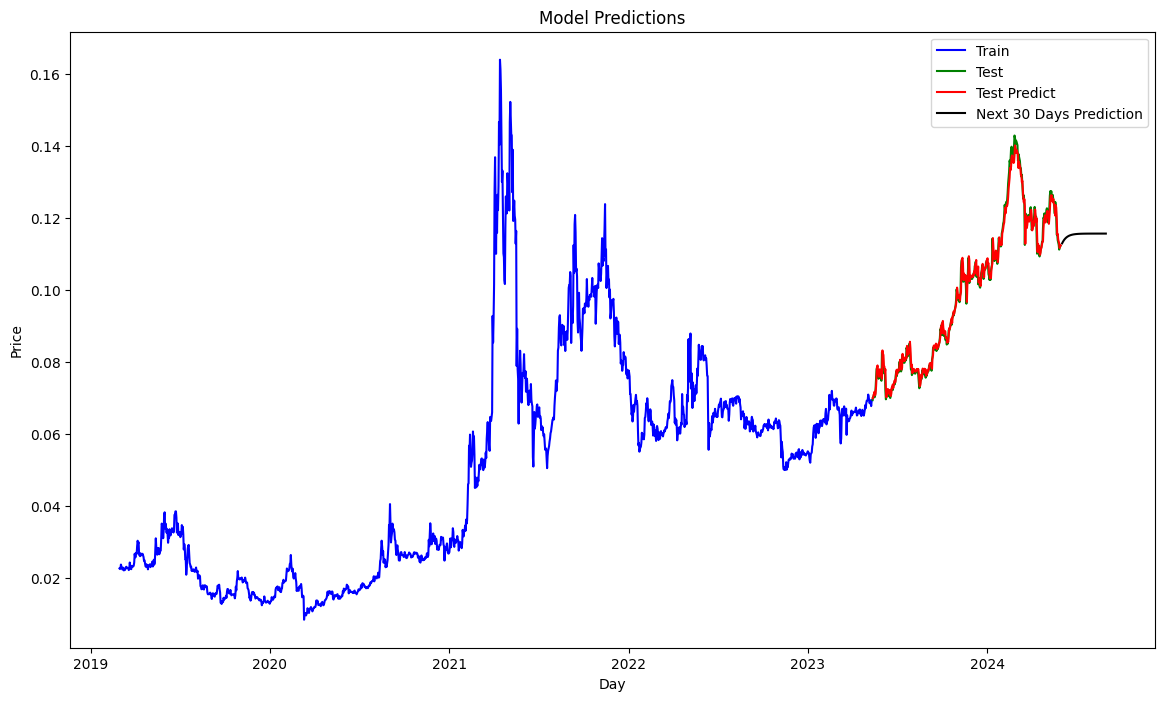

In [82]:

y_train_TRONCoin_82_inv = scaler.inverse_transform([y_train_TRONCoin_82])
y_pred_TRONCoin_82_inv = scaler.inverse_transform(y_pred_TRONCoin_82)
future_dates_TRONCoin_90days_82 = pd.date_range(start=TRONCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_82):(len(X_train_TRONCoin_82) + len(X_test_TRONCoin_82))]
plt.plot(test_index, y_test_TRONCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_90days_82, predictions_TRONCoin_90days_82_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


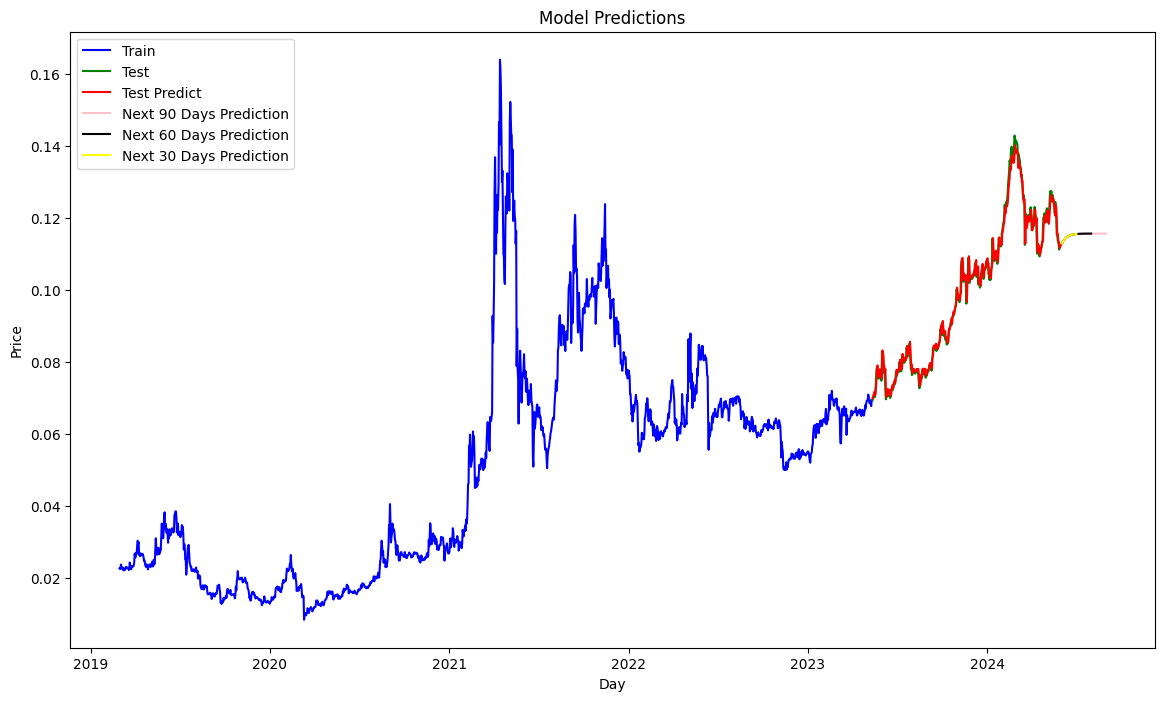

In [83]:

y_train_TRONCoin_82_inv = scaler.inverse_transform([y_train_TRONCoin_82])
y_pred_TRONCoin_82_inv = scaler.inverse_transform(y_pred_TRONCoin_82)
future_dates = pd.date_range(start=TRONCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_82)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_82_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_82):(len(X_train_TRONCoin_82) + len(X_test_TRONCoin_82))]
plt.plot(test_index, y_test_TRONCoin_82_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_82_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_90days_82, predictions_TRONCoin_90days_82_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_TRONCoin_60days_82, predictions_TRONCoin_60days_82_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_TRONCoin_30days_82, predictions_TRONCoin_30days_82_inv , label='Next 30 Days Prediction', color='yellow')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [84]:
y_pred_TRONCoin_82_inv = scaler.inverse_transform([y_pred_TRONCoin_82.flatten()])
# Tính toán MSE và MAPE
mse_82 = mean_squared_error(y_test_TRONCoin_82_inv[0], y_pred_TRONCoin_82_inv[0])
rmse_82 = np.sqrt(mse_82)
mape_82 = mean_absolute_percentage_error(y_test_TRONCoin_82_inv[0], y_pred_TRONCoin_82_inv[0])
print(f"MSE: {mse_82}")
print(f"RMSE: {rmse_82}")
print(f"MAPE: {mape_82}")


MSE: 4.031282451985112e-06
RMSE: 0.0020078053819992396
MAPE: 0.014188587750518957


## Devide data 7:3

In [85]:

X_train_TRONCoin_73, X_test_TRONCoin_73, y_train_TRONCoin_73, y_test_TRONCoin_73 = train_test_split(X, Y, test_size=0.3, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_TRONCoin_73 = np.reshape(X_train_TRONCoin_73, (X_train_TRONCoin_73.shape[0], X_train_TRONCoin_73.shape[1], 1))
X_test_TRONCoin_73 = np.reshape(X_test_TRONCoin_73, (X_test_TRONCoin_73.shape[0], X_test_TRONCoin_73.shape[1], 1))


Build and fit model MLP

In [86]:
MLP_Model_TRONCoin_73 = Sequential()
MLP_Model_TRONCoin_73.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_TRONCoin_73.add(Dense(64, activation='relu'))
MLP_Model_TRONCoin_73.add(Dense(32, activation='relu'))
MLP_Model_TRONCoin_73.add(Dense(1))
MLP_Model_TRONCoin_73.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_TRONCoin_73.summary()
MLP_Model_TRONCoin_73.fit(X_train_TRONCoin_73, y_train_TRONCoin_73, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
21/21 - 1s - 28ms/step - loss: 0.0361
Epoch 2/100
21/21 - 0s - 1ms/step - loss: 0.0071
Epoch 3/100
21/21 - 0s - 1ms/step - loss: 0.0033
Epoch 4/100
21/21 - 0s - 1ms/step - loss: 0.0013
Epoch 5/100
21/21 - 0s - 2ms/step - loss: 6.0289e-04
Epoch 6/100
21/21 - 0s - 1ms/step - loss: 4.9009e-04
Epoch 7/100
21/21 - 0s - 2ms/step - loss: 4.8992e-04
Epoch 8/100
21/21 - 0s - 2ms/step - loss: 4.9031e-04
Epoch 9/100
21/21 - 0s - 2ms/step - loss: 4.9195e-04
Epoch 10/100
21/21 - 0s - 1ms/step - loss: 4.8613e-04
Epoch 11/100
21/21 - 0s - 2ms/step - loss: 4.8622e-04
Epoch 12/100
21/21 - 0s - 2ms/step - loss: 4.8387e-04
Epoch 13/100
21/21 - 0s - 1ms/step - loss: 4.8995e-04
Epoch 14/100
21/21 - 0s - 2ms/step - loss: 4.8465e-04
Epoch 15/100
21/21 - 0s - 1ms/step - loss: 4.8593e-04
Epoch 16/100
21/21 - 0s - 1ms/step - loss: 4.8464e-04
Epoch 17/100
21/21 - 0s - 2ms/step - loss: 4.9306e-04
Epoch 18/100
21/21 - 0s - 1ms/step - loss: 4.9222e-04
Epoch 19/100
21/21 - 0s - 739us/step - loss: 4.9705e

Predict in test

In [87]:
y_pred_TRONCoin_73 = MLP_Model_TRONCoin_73.predict(X_test_TRONCoin_73)
y_test_TRONCoin_73_inv = scaler.inverse_transform([y_test_TRONCoin_73])
y_pred_TRONCoin_73_inv = scaler.inverse_transform([y_pred_TRONCoin_73.flatten()])


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 924us/step


Predict 30 days

In [88]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_30days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━

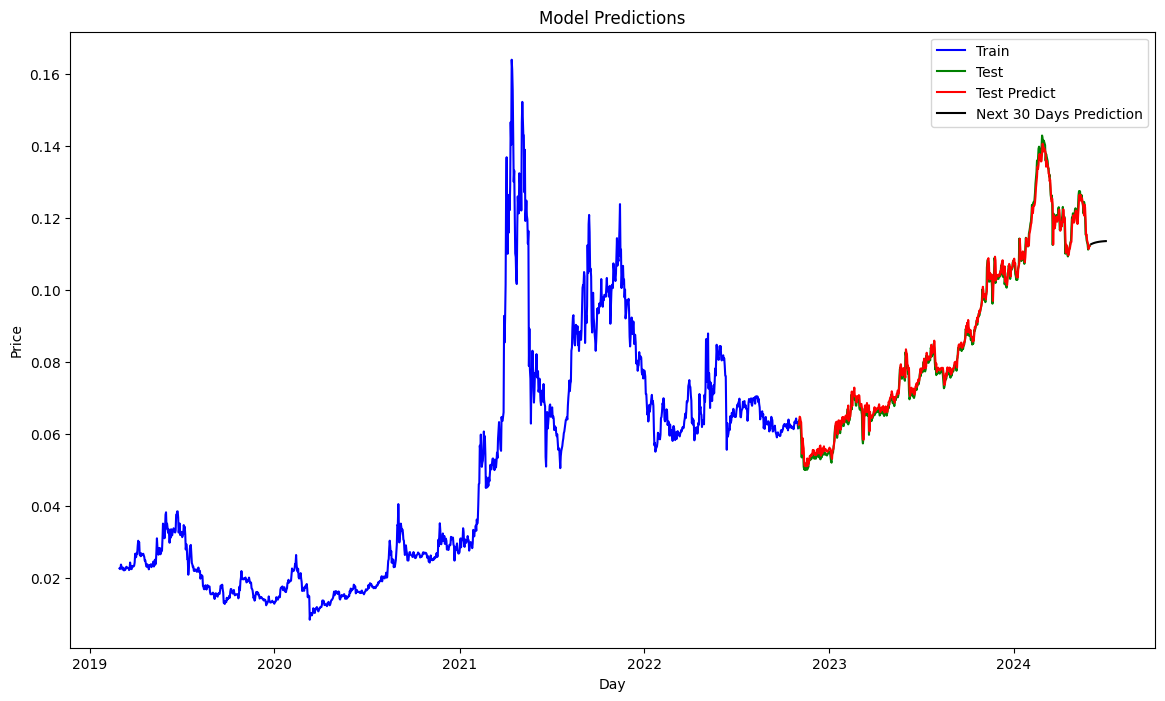

In [89]:

y_train_TRONCoin_73_inv = scaler.inverse_transform([y_train_TRONCoin_73])
y_pred_TRONCoin_73_inv = scaler.inverse_transform(y_pred_TRONCoin_73)
future_dates_TRONCoin_30days_73 = pd.date_range(start=TRONCoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_73):(len(X_train_TRONCoin_73) + len(X_test_TRONCoin_73))]
plt.plot(test_index, y_test_TRONCoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_30days_73, predictions_TRONCoin_30days_73_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [90]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_60days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━

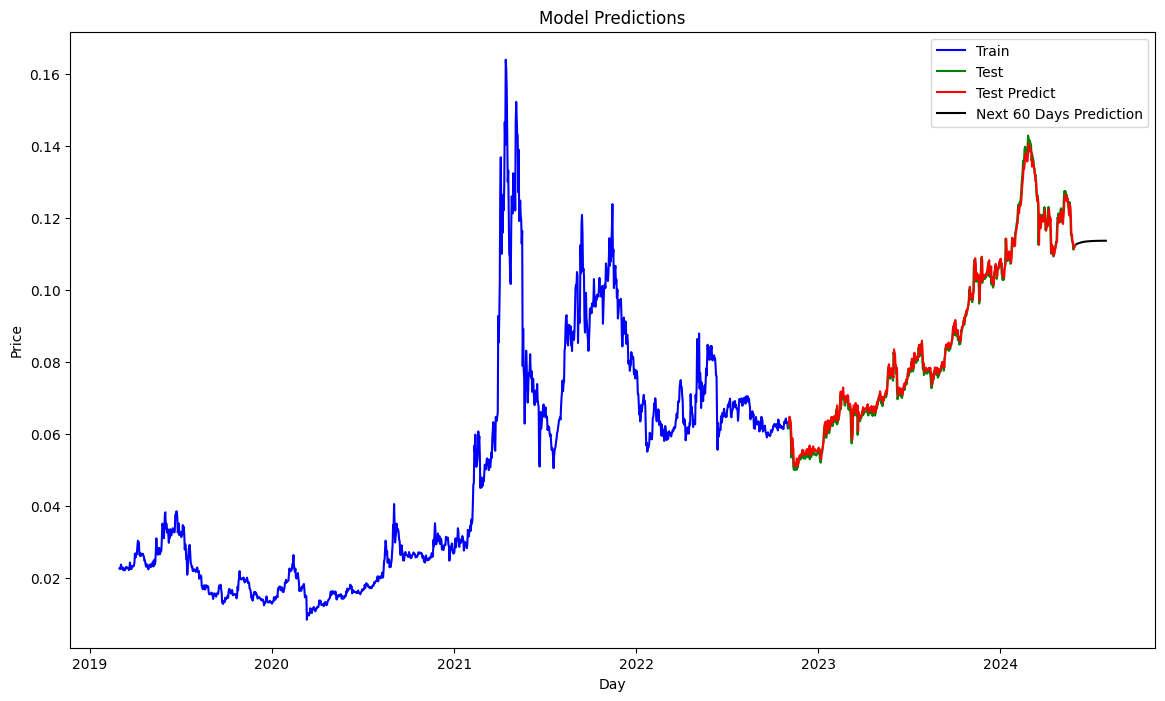

In [91]:

y_train_TRONCoin_73_inv = scaler.inverse_transform([y_train_TRONCoin_73])
y_pred_TRONCoin_73_inv = scaler.inverse_transform(y_pred_TRONCoin_73)
future_dates_TRONCoin_60days_73 = pd.date_range(start=TRONCoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_73):(len(X_train_TRONCoin_73) + len(X_test_TRONCoin_73))]
plt.plot(test_index, y_test_TRONCoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_60days_73, predictions_TRONCoin_60days_73_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [92]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_73.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_90days_73_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━

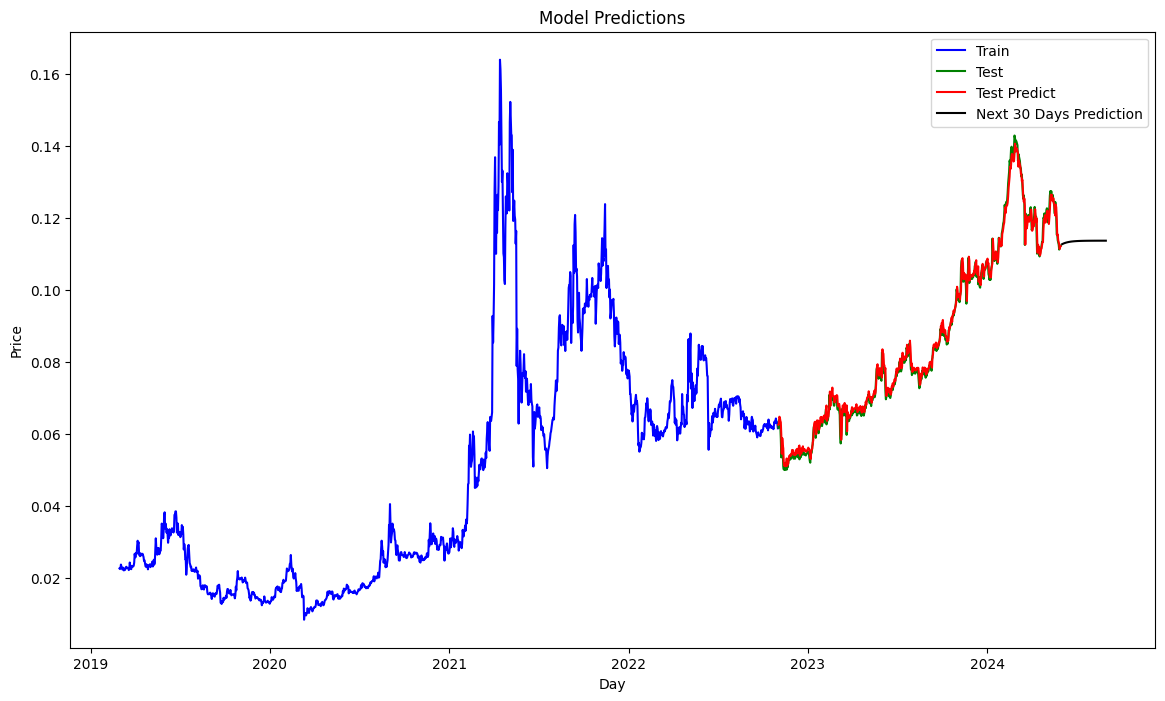

In [93]:

y_train_TRONCoin_73_inv = scaler.inverse_transform([y_train_TRONCoin_73])
y_pred_TRONCoin_73_inv = scaler.inverse_transform(y_pred_TRONCoin_73)
future_dates_TRONCoin_90days_73 = pd.date_range(start=TRONCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_73):(len(X_train_TRONCoin_73) + len(X_test_TRONCoin_73))]
plt.plot(test_index, y_test_TRONCoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_90days_73, predictions_TRONCoin_90days_73_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


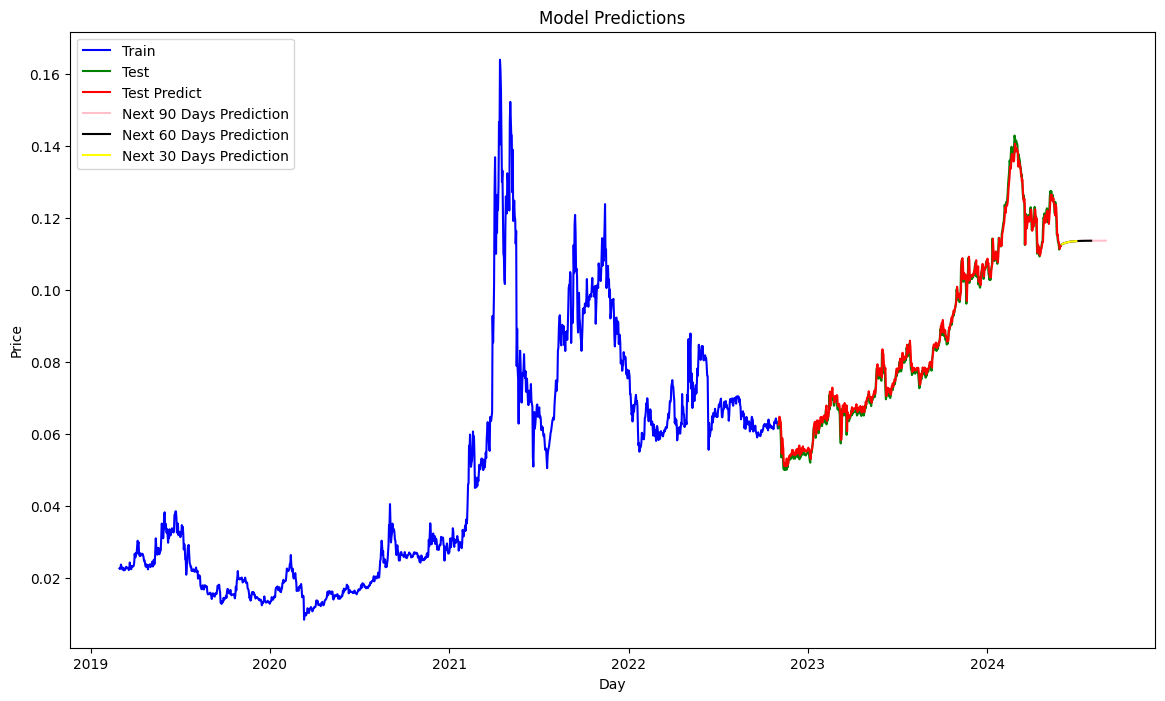

In [94]:

y_train_TRONCoin_73_inv = scaler.inverse_transform([y_train_TRONCoin_73])
y_pred_TRONCoin_73_inv = scaler.inverse_transform(y_pred_TRONCoin_73)
future_dates = pd.date_range(start=TRONCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_73)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_73_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_73):(len(X_train_TRONCoin_73) + len(X_test_TRONCoin_73))]
plt.plot(test_index, y_test_TRONCoin_73_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_73_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_90days_73, predictions_TRONCoin_90days_73_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_TRONCoin_60days_73, predictions_TRONCoin_60days_73_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_TRONCoin_30days_73, predictions_TRONCoin_30days_73_inv , label='Next 30 Days Prediction', color='yellow')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [95]:
y_pred_TRONCoin_73_inv = scaler.inverse_transform([y_pred_TRONCoin_73.flatten()])
# Tính toán MSE và MAPE
mse_73 = mean_squared_error(y_test_TRONCoin_73_inv[0], y_pred_TRONCoin_73_inv[0])
rmse_73 = np.sqrt(mse_73)
mape_73 = mean_absolute_percentage_error(y_test_TRONCoin_73_inv[0], y_pred_TRONCoin_73_inv[0])
print(f"MSE: {mse_73}")
print(f"RMSE: {rmse_73}")
print(f"MAPE: {mape_73}")


MSE: 3.886093389449394e-06
RMSE: 0.0019713176784702646
MAPE: 0.017401365047431054


## Devide data 9:1

In [96]:

X_train_TRONCoin_91, X_test_TRONCoin_91, y_train_TRONCoin_91, y_test_TRONCoin_91 = train_test_split(X, Y, test_size=0.1, shuffle=False)

# Reshape input to be [samples, time steps, features]
X_train_TRONCoin_91 = np.reshape(X_train_TRONCoin_91, (X_train_TRONCoin_91.shape[0], X_train_TRONCoin_91.shape[1], 1))
X_test_TRONCoin_91 = np.reshape(X_test_TRONCoin_91, (X_test_TRONCoin_91.shape[0], X_test_TRONCoin_91.shape[1], 1))


Build and fit model MLP

In [97]:
MLP_Model_TRONCoin_91 = Sequential()
MLP_Model_TRONCoin_91.add(Flatten(input_shape=(look_back, 1)))
MLP_Model_TRONCoin_91.add(Dense(64, activation='relu'))
MLP_Model_TRONCoin_91.add(Dense(32, activation='relu'))
MLP_Model_TRONCoin_91.add(Dense(1))
MLP_Model_TRONCoin_91.compile(loss='mean_squared_error', optimizer='adam')
MLP_Model_TRONCoin_91.summary()
MLP_Model_TRONCoin_91.fit(X_train_TRONCoin_91, y_train_TRONCoin_91, epochs=100, batch_size=64, verbose=2)


c:\Users\Rua\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
27/27 - 1s - 21ms/step - loss: 0.0669
Epoch 2/100
27/27 - 0s - 1ms/step - loss: 0.0094
Epoch 3/100
27/27 - 0s - 1ms/step - loss: 0.0046
Epoch 4/100
27/27 - 0s - 1ms/step - loss: 0.0019
Epoch 5/100
27/27 - 0s - 1ms/step - loss: 7.7150e-04
Epoch 6/100
27/27 - 0s - 1ms/step - loss: 4.5819e-04
Epoch 7/100
27/27 - 0s - 1ms/step - loss: 4.1541e-04
Epoch 8/100
27/27 - 0s - 1ms/step - loss: 4.1271e-04
Epoch 9/100
27/27 - 0s - 1ms/step - loss: 4.0966e-04
Epoch 10/100
27/27 - 0s - 1ms/step - loss: 4.0693e-04
Epoch 11/100
27/27 - 0s - 1ms/step - loss: 4.0551e-04
Epoch 12/100
27/27 - 0s - 1ms/step - loss: 4.0449e-04
Epoch 13/100
27/27 - 0s - 1ms/step - loss: 4.0521e-04
Epoch 14/100
27/27 - 0s - 1ms/step - loss: 4.0228e-04
Epoch 15/100
27/27 - 0s - 1ms/step - loss: 4.0851e-04
Epoch 16/100
27/27 - 0s - 1ms/step - loss: 4.0952e-04
Epoch 17/100
27/27 - 0s - 2ms/step - loss: 4.0737e-04
Epoch 18/100
27/27 - 0s - 1ms/step - loss: 4.0954e-04
Epoch 19/100
27/27 - 0s - 1ms/step - loss: 4.0829e-0

Predict in test

In [98]:
y_pred_TRONCoin_91 = MLP_Model_TRONCoin_91.predict(X_test_TRONCoin_91)
y_test_TRONCoin_91_inv = scaler.inverse_transform([y_test_TRONCoin_91])
y_pred_TRONCoin_91_inv = scaler.inverse_transform([y_pred_TRONCoin_91.flatten()])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


Predict 30 days

In [99]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(30):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_30days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━

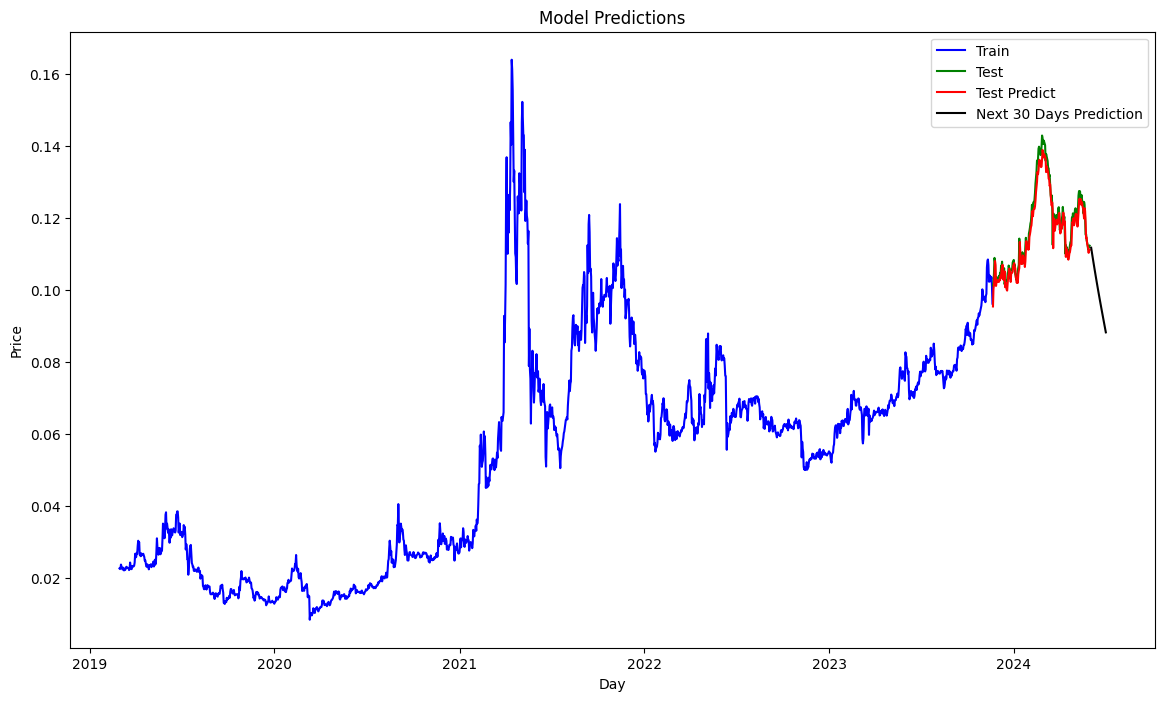

In [100]:

y_train_TRONCoin_91_inv = scaler.inverse_transform([y_train_TRONCoin_91])
y_pred_TRONCoin_91_inv = scaler.inverse_transform(y_pred_TRONCoin_91)
future_dates_TRONCoin_30days_91 = pd.date_range(start=TRONCoindata.index[-1], periods=31)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_91):(len(X_train_TRONCoin_91) + len(X_test_TRONCoin_91))]
plt.plot(test_index, y_test_TRONCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_30days_91, predictions_TRONCoin_30days_91_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 60 days

In [101]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(60):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_60days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

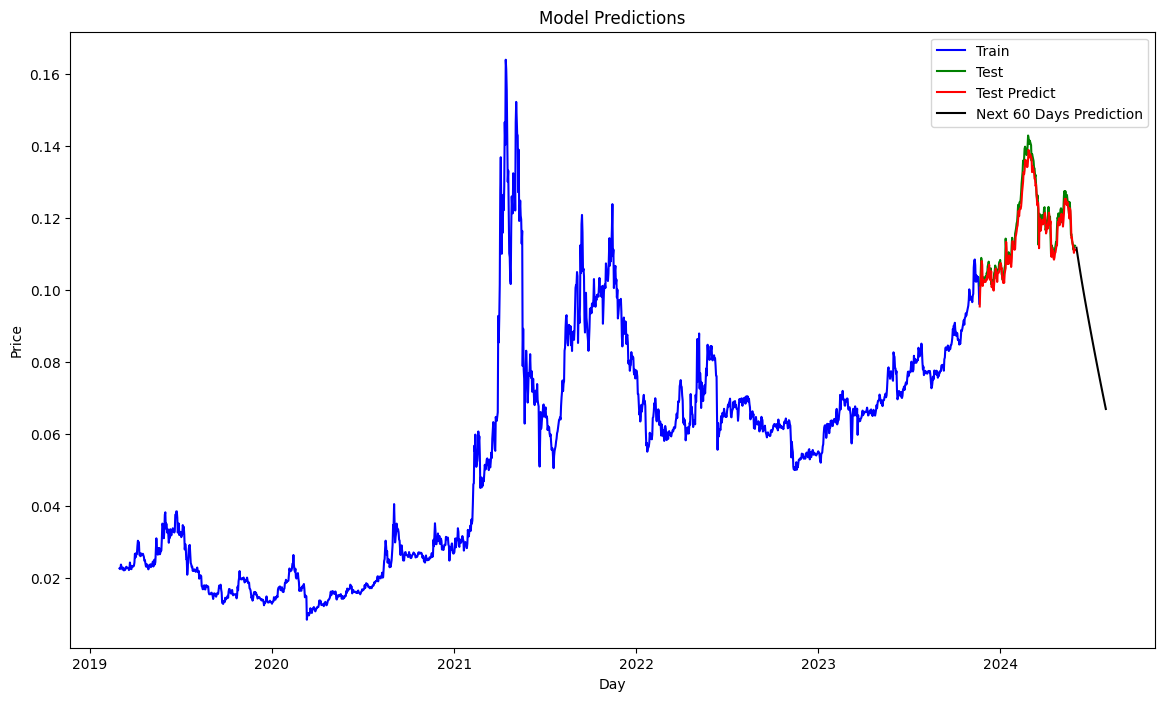

In [102]:

y_train_TRONCoin_91_inv = scaler.inverse_transform([y_train_TRONCoin_91])
y_pred_TRONCoin_91_inv = scaler.inverse_transform(y_pred_TRONCoin_91)
future_dates_TRONCoin_60days_91 = pd.date_range(start=TRONCoindata.index[-1], periods=61)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_91):(len(X_train_TRONCoin_91) + len(X_test_TRONCoin_91))]
plt.plot(test_index, y_test_TRONCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_60days_91, predictions_TRONCoin_60days_91_inv , label='Next 60 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


Predict 90 days

In [103]:
last_value = scaled_data[-look_back:]
predictions = []

for _ in range(90):
    last_value_reshaped = np.reshape(last_value, (1, look_back, 1))
    next_pred = MLP_Model_TRONCoin_91.predict(last_value_reshaped)
    predictions.append(next_pred[0, 0])
    last_value = np.append(last_value[1:], next_pred, axis=0)

predictions_TRONCoin_90days_91_inv = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

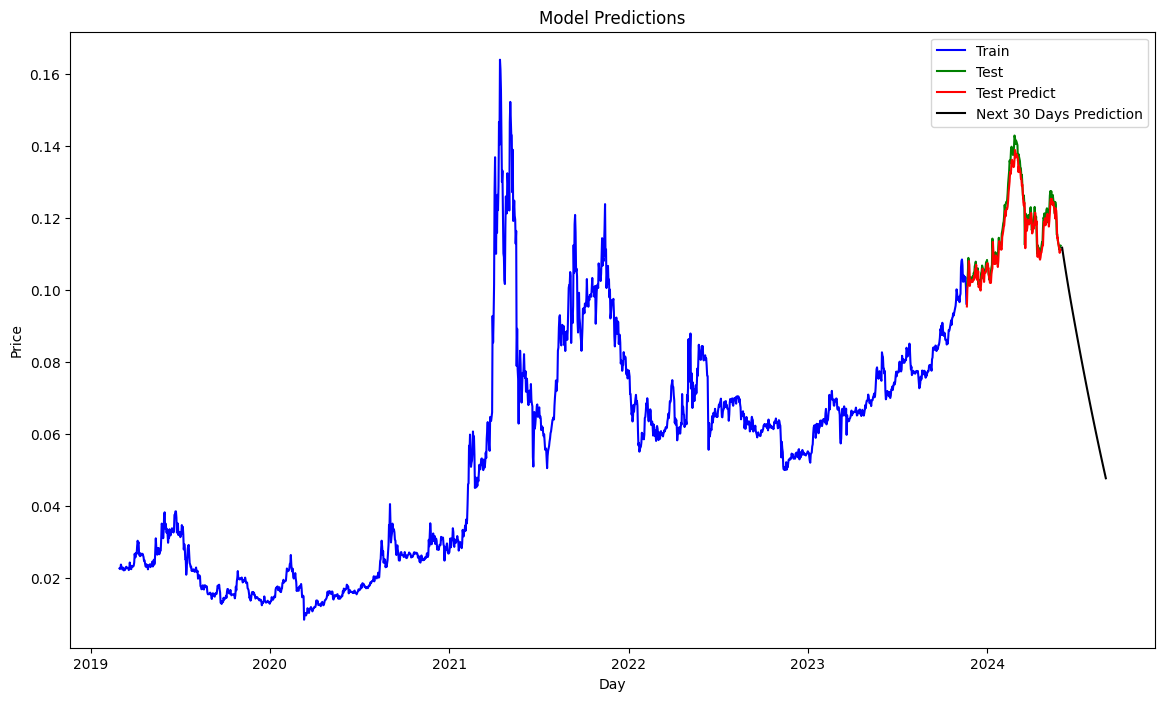

In [104]:

y_train_TRONCoin_91_inv = scaler.inverse_transform([y_train_TRONCoin_91])
y_pred_TRONCoin_91_inv = scaler.inverse_transform(y_pred_TRONCoin_91)
future_dates_TRONCoin_90days_91 = pd.date_range(start=TRONCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_91):(len(X_train_TRONCoin_91) + len(X_test_TRONCoin_91))]
plt.plot(test_index, y_test_TRONCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_90days_91, predictions_TRONCoin_90days_91_inv , label='Next 30 Days Prediction', color='black')

plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


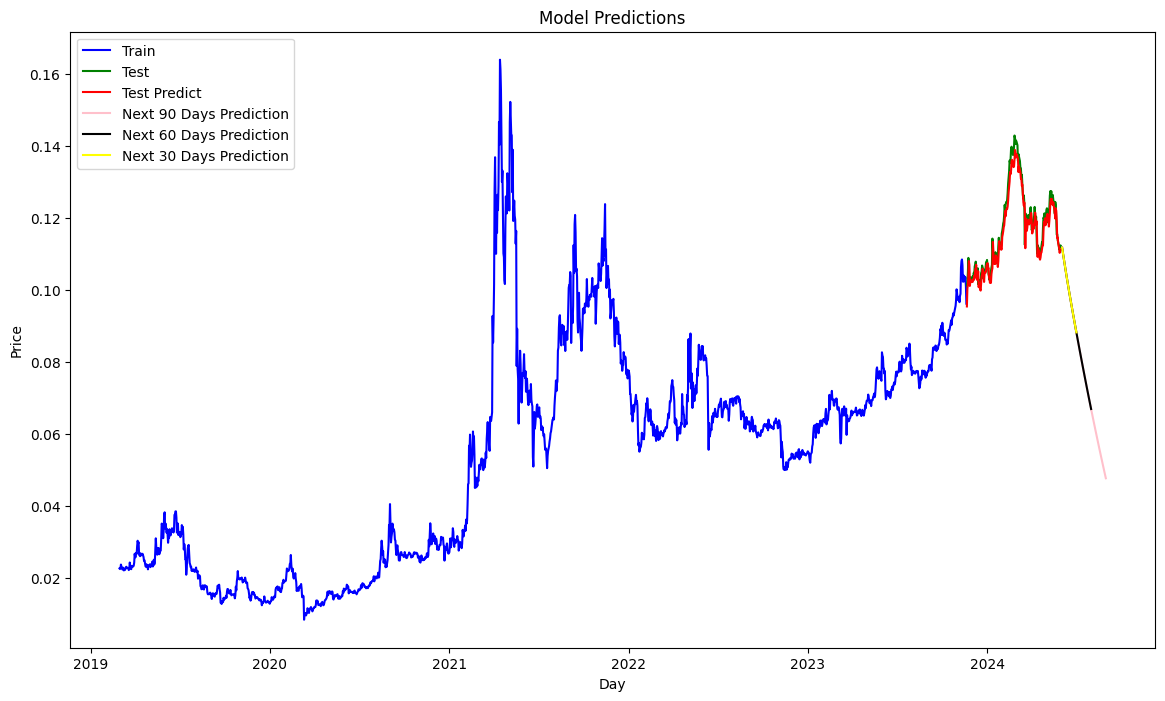

In [105]:

y_train_TRONCoin_91_inv = scaler.inverse_transform([y_train_TRONCoin_91])
y_pred_TRONCoin_91_inv = scaler.inverse_transform(y_pred_TRONCoin_91)
future_dates = pd.date_range(start=TRONCoindata.index[-1], periods=91)[1:]

plt.figure(figsize=(14, 8))

# Vẽ dữ liệu huấn luyện (train) với màu xanh dương
train_index = TRONCoindata.index[:len(X_train_TRONCoin_91)]  # Chọn chỉ số từ đầu đến cuối của dữ liệu huấn luyện
plt.plot(train_index, y_train_TRONCoin_91_inv[0], label='Train', color='blue')

# Vẽ dữ liệu kiểm tra (test) với màu xanh lá cây
test_index = TRONCoindata.index[len(X_train_TRONCoin_91):(len(X_train_TRONCoin_91) + len(X_test_TRONCoin_91))]
plt.plot(test_index, y_test_TRONCoin_91_inv[0], label='Test', color='green')

# Vẽ dự đoán trên tập test với màu đỏ
plt.plot(test_index, y_pred_TRONCoin_91_inv, label='Test Predict ', color='red')

# Vẽ Next 30 Days Prediction với màu đen
plt.plot(future_dates_TRONCoin_90days_91, predictions_TRONCoin_90days_91_inv , label='Next 90 Days Prediction', color='pink')
plt.plot(future_dates_TRONCoin_60days_91, predictions_TRONCoin_60days_91_inv , label='Next 60 Days Prediction', color='black')
plt.plot(future_dates_TRONCoin_30days_91, predictions_TRONCoin_30days_91_inv , label='Next 30 Days Prediction', color='yellow')


plt.title('Model Predictions')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()


In [106]:
y_pred_TRONCoin_91_inv = scaler.inverse_transform([y_pred_TRONCoin_91.flatten()])
# Tính toán MSE và MAPE
mse_91 = mean_squared_error(y_test_TRONCoin_91_inv[0], y_pred_TRONCoin_91_inv[0])
rmse_91 = np.sqrt(mse_91)
mape_91 = mean_absolute_percentage_error(y_test_TRONCoin_91_inv[0], y_pred_TRONCoin_91_inv[0])
print(f"MSE: {mse_91}")
print(f"RMSE: {rmse_91}")
print(f"MAPE: {mape_91}")


MSE: 7.482689362797914e-06
RMSE: 0.0027354504862632614
MAPE: 0.01816745012694425
